## Employee Compensation

### Procedure for Solving the Problems

1. Univariate Analysis.
2. Outlier Treatment.
3. Missing Value Treatment.
4. Univariate.
5. Bivariate. - Num vs Num (Scatter Plot). Cat vs Num(Boxplot)
6. Multivariate.
7. Feature Engineering.
8. Scaling and Transformation.

### Modelling

1. Split the Data into Train and Test.
2. Build the Model- Linear Regression.
3. Evaluate the performance - r2 , RMSE.
4. Underfitting vs Overfitting (Bias vs Variance).
5. Assumption of the Model.
7. Cross validation Approach and Feature Selection.
6. If Assumptions fail - then apply Decision Tree, Random Forest, Bagging, Boosting models are build.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")
# from pandas import Series,DataFrame

In [3]:
rcParams['figure.figsize'] = 10,6

In [4]:
df_emp=pd.read_csv("employee_compensation.csv")
df_emp.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [1]:
# salary + overtime + other_salaries = Total Salary
# retirement + health/Dental + other benefits = Total_Benefits
# presence of multicollinearity.

There will be correlation between the data points for Total Salary and Total Benefits

### Remove Insignificant Variables

1. Year is categorical. You cannot do operation on it
2. Emp Id is not required.

In [5]:
df_emp.drop(['Employee_Identifier','Year'],axis=1,inplace=True)
df_emp.head()

,Year_Type,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [6]:
df_emp.shape

(50000, 10)

### Pre Checks

In [7]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Type           50000 non-null  object 
 1   Salaries            50000 non-null  float64
 2   Overtime            50000 non-null  float64
 3   Other_Salaries      50000 non-null  float64
 4   Total_Salary        50000 non-null  float64
 5   Retirement          50000 non-null  float64
 6   Health/Dental       50000 non-null  float64
 7   Other_Benefits      50000 non-null  float64
 8   Total_Benefits      50000 non-null  float64
 9   Total_Compensation  50000 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.8+ MB


**Seperate the Numerical variables**

In [8]:
# exclude=np.number will return all categorical data
cols=list(df_emp.select_dtypes(include=np.number).columns)
cols

['Salaries',
 'Overtime',
 'Other_Salaries',
 'Total_Salary',
 'Retirement',
 'Health/Dental',
 'Other_Benefits',
 'Total_Benefits',
 'Total_Compensation']

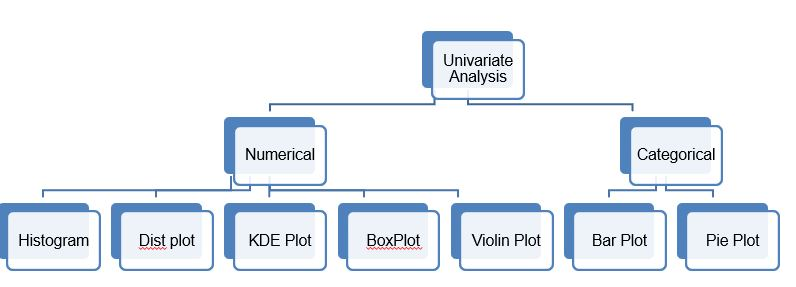

In [9]:
from IPython.display import Image
Image(filename='Univariate.JPG',width=600,height=200)

### Univariate Analysis

In [10]:
list_country = [ "India", "Srilanka", "England", "Australia" ]
Icc_Ranking = [ 1, 5, 2, 3 ]

Country_Ranks = zip(list_country, Icc_Ranking)

print(set(Country_Ranks))

{('India', 1), ('Srilanka', 5), ('Australia', 3), ('England', 2)}


1. flatten()- method of np.array.

In [11]:
a = np.array( [ (1,7,3,4),(3,2,4,1) ])
a

array([[1, 7, 3, 4],
       [3, 2, 4, 1]])

In [12]:
a.flatten()

array([1, 7, 3, 4, 3, 2, 4, 1])

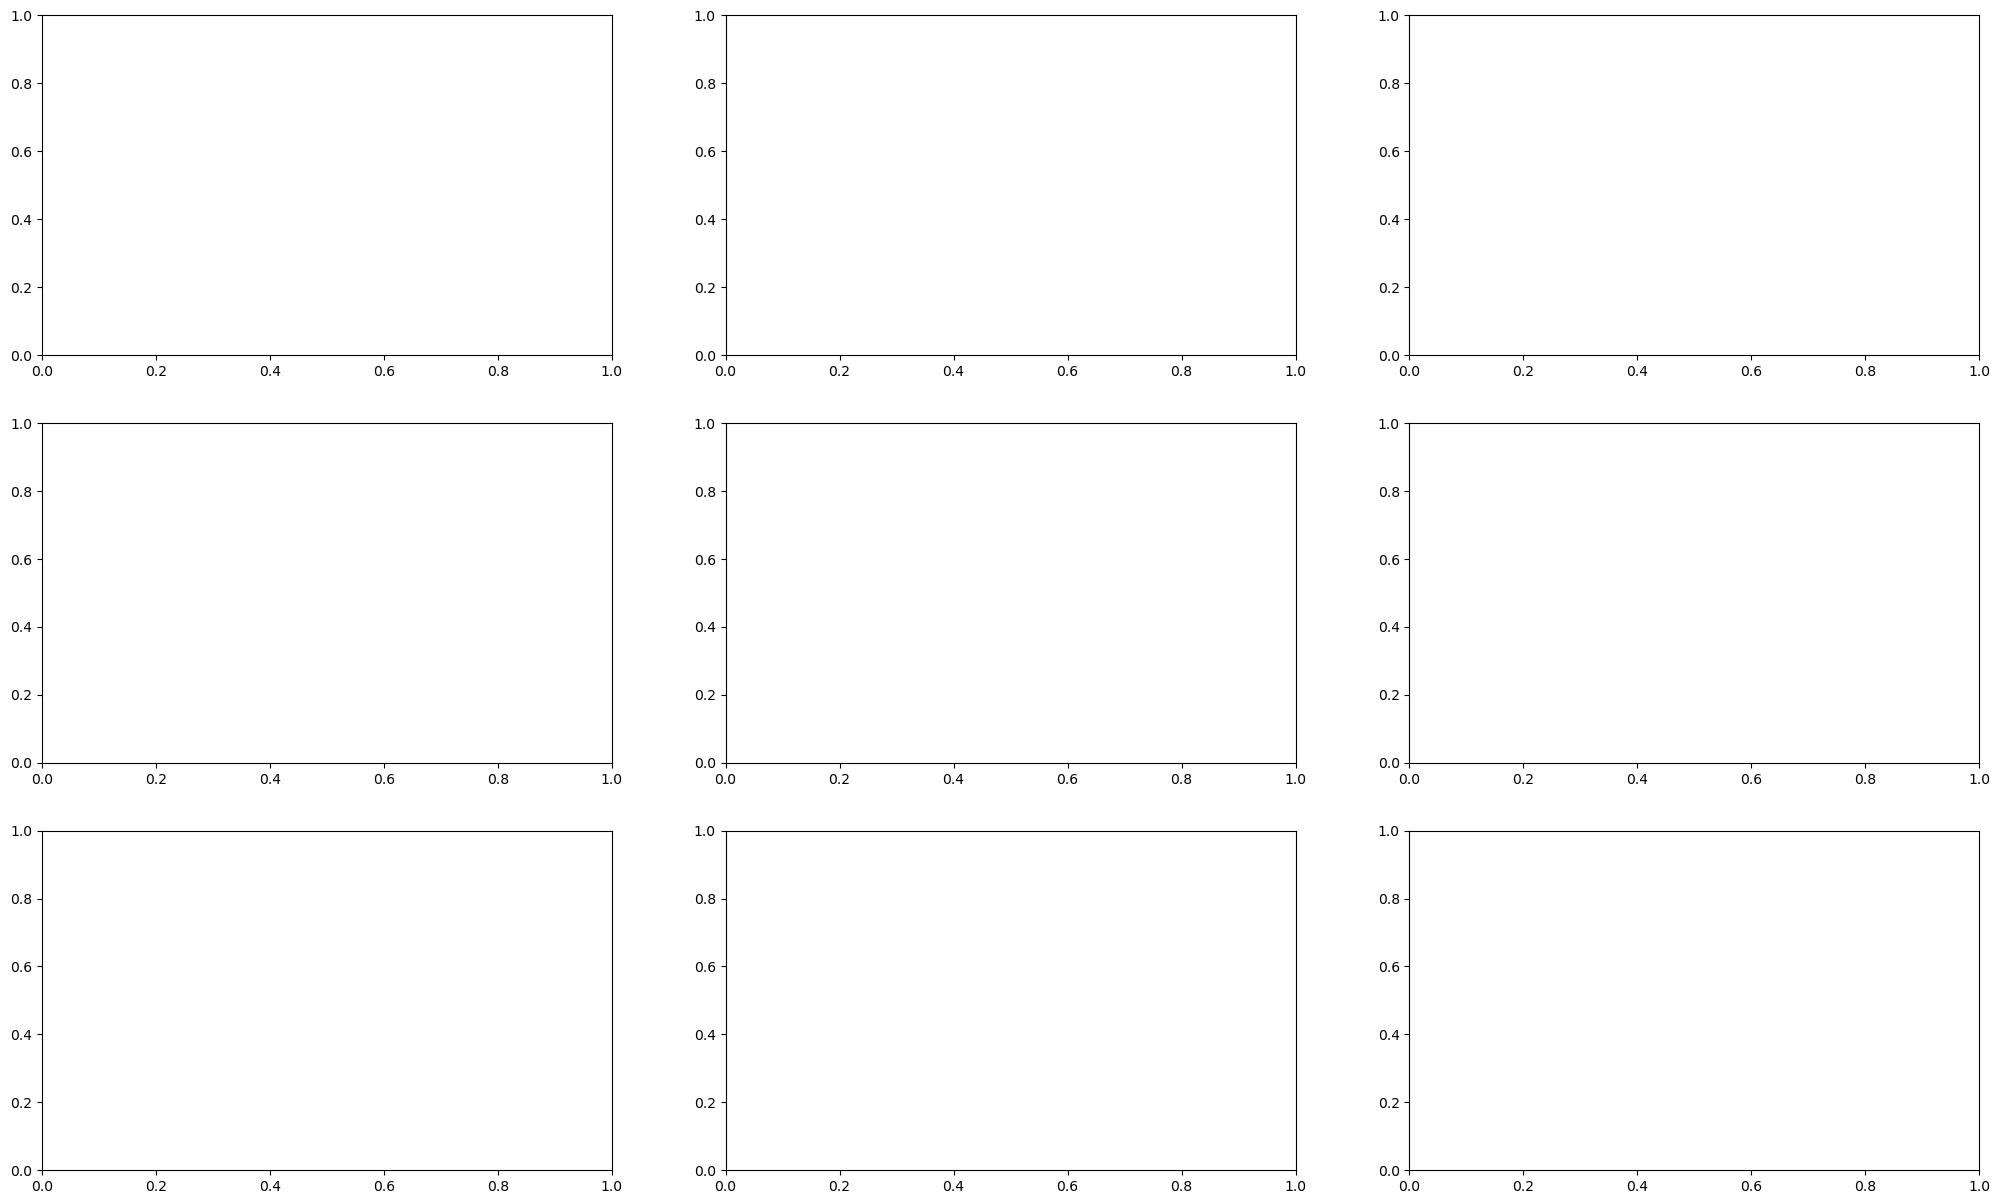

In [13]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

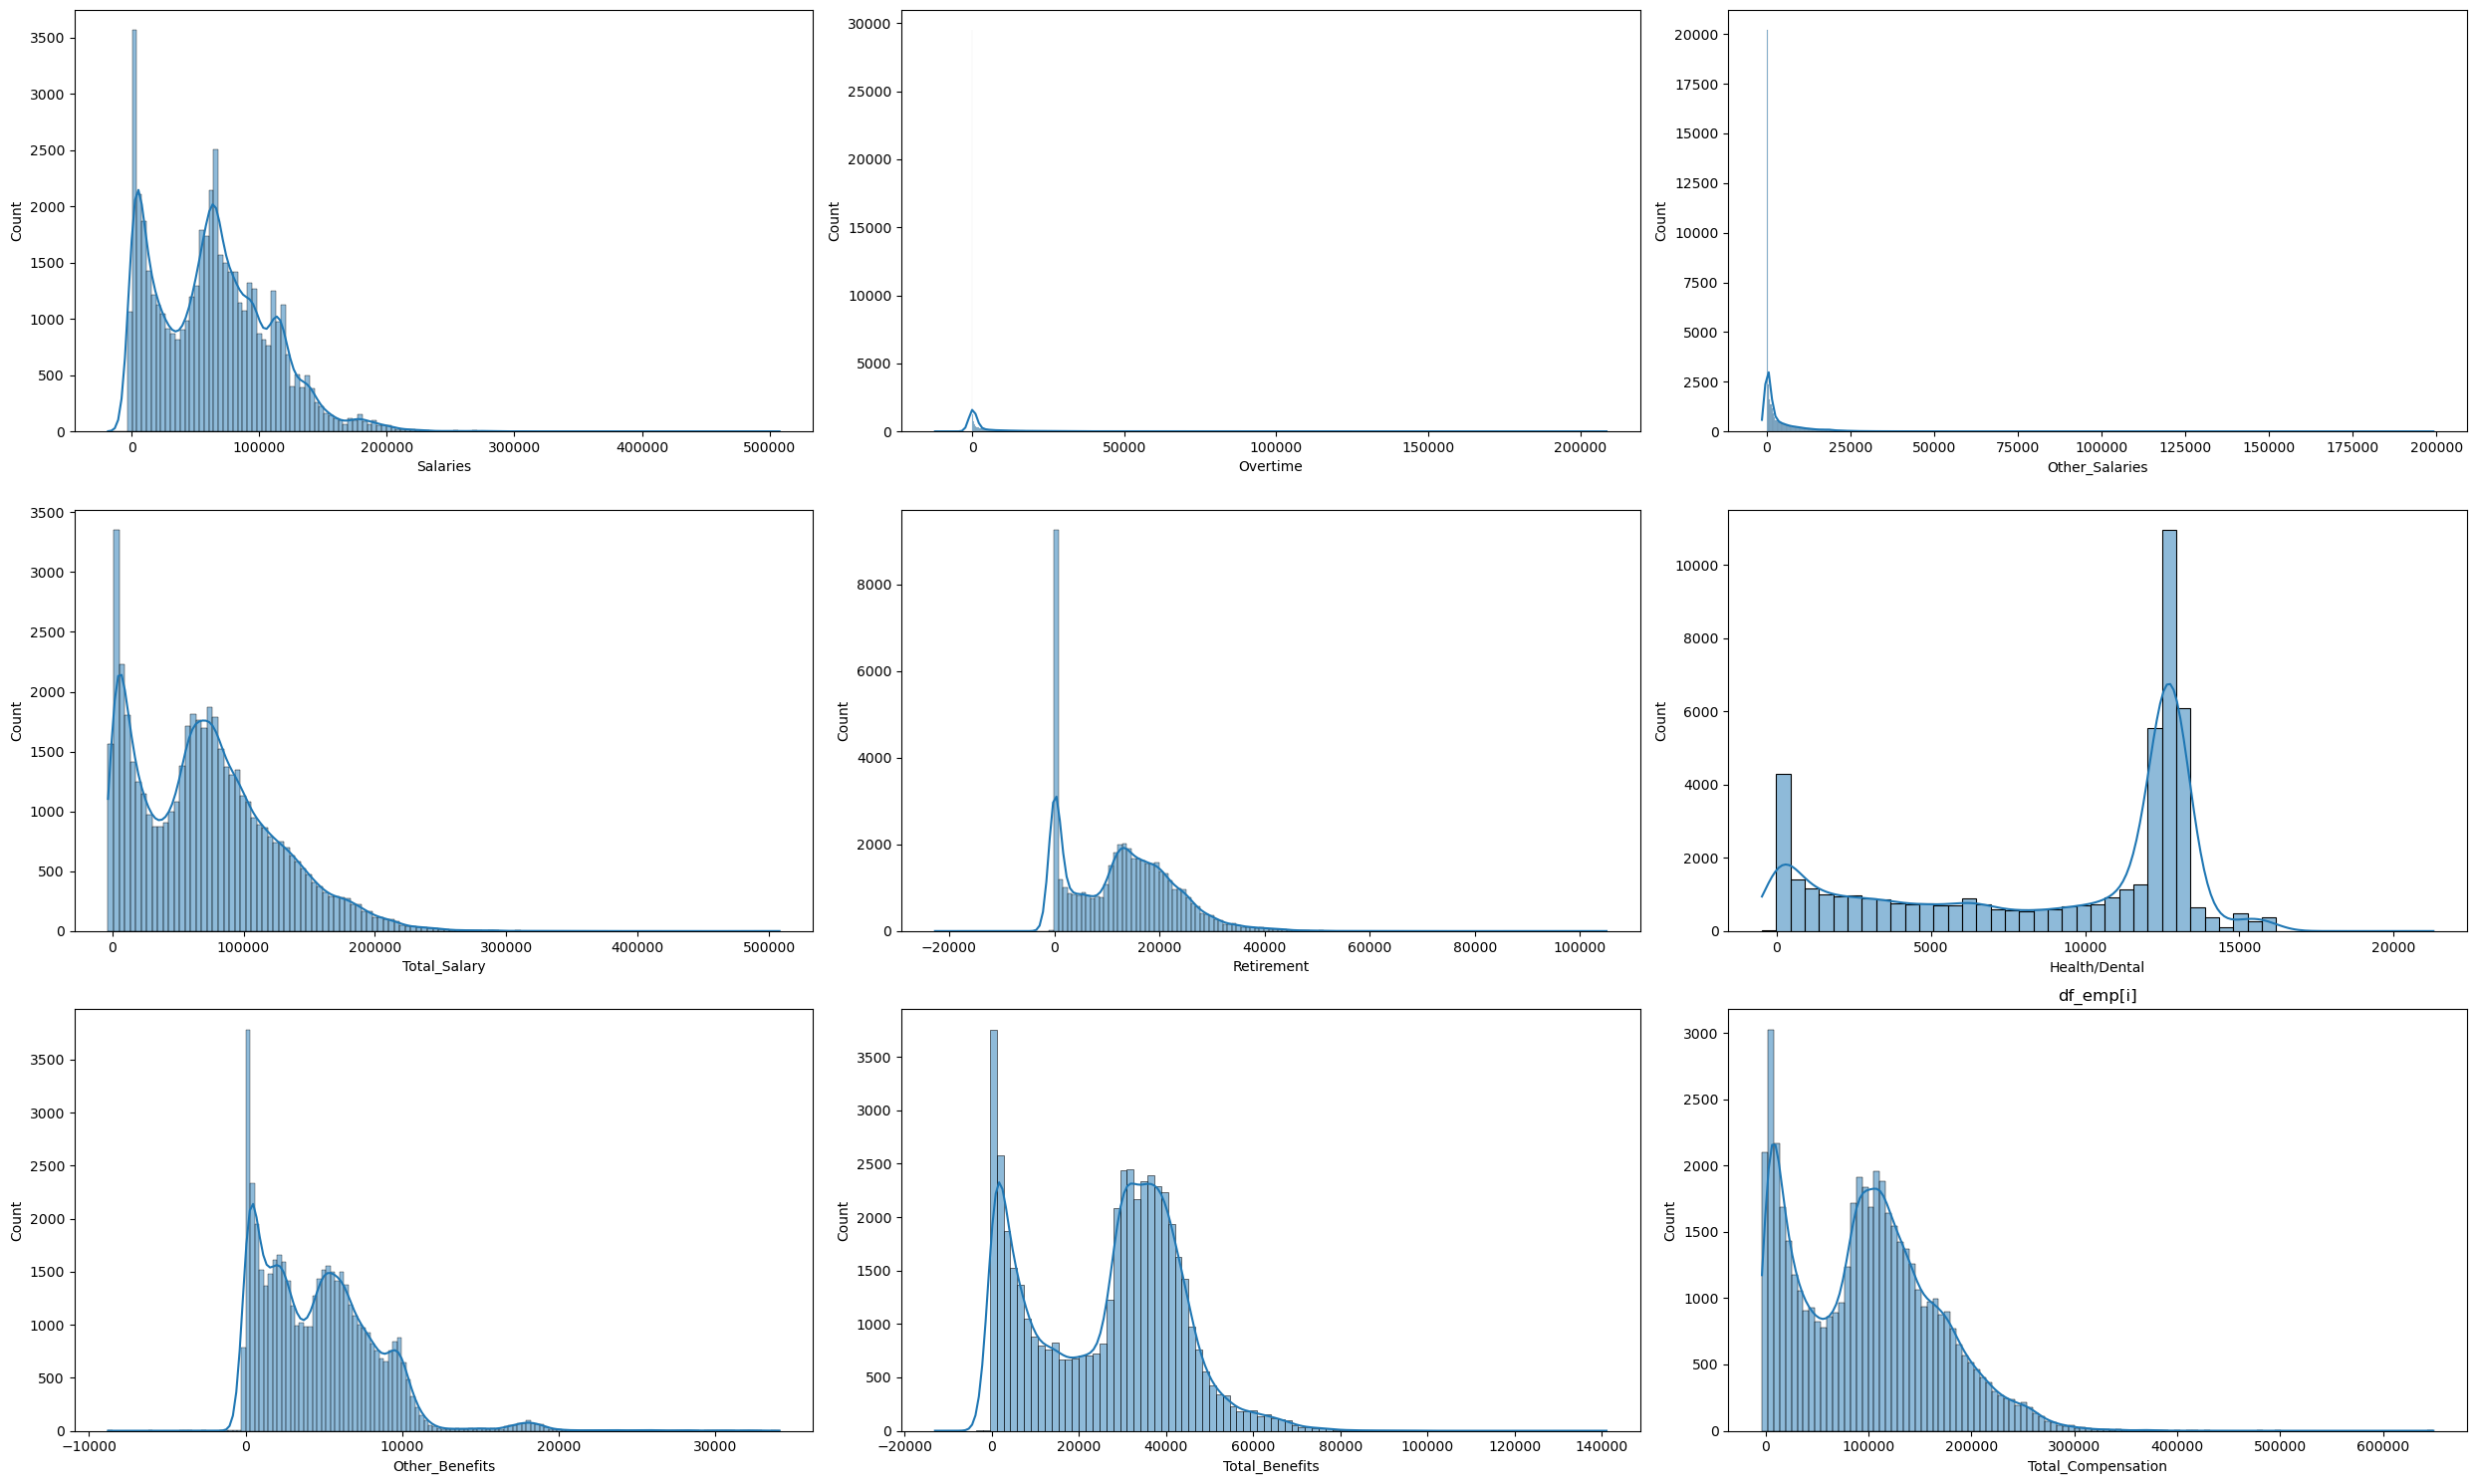

In [14]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df_emp[i], ax=subplot,kde=True)
    plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

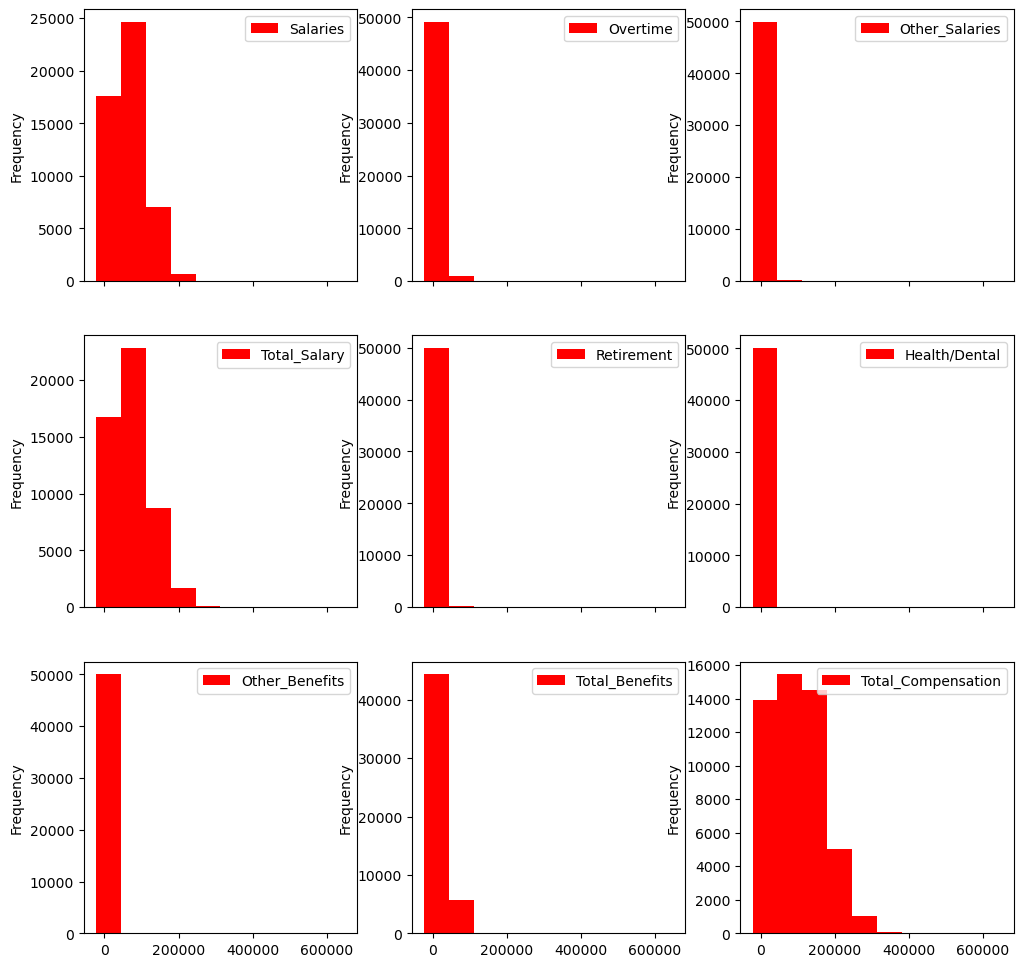

In [15]:
df_emp.plot(kind='hist',figsize=(12,12),color='red',layout=(3,3),subplots=True,sharey=False);
plt.show();

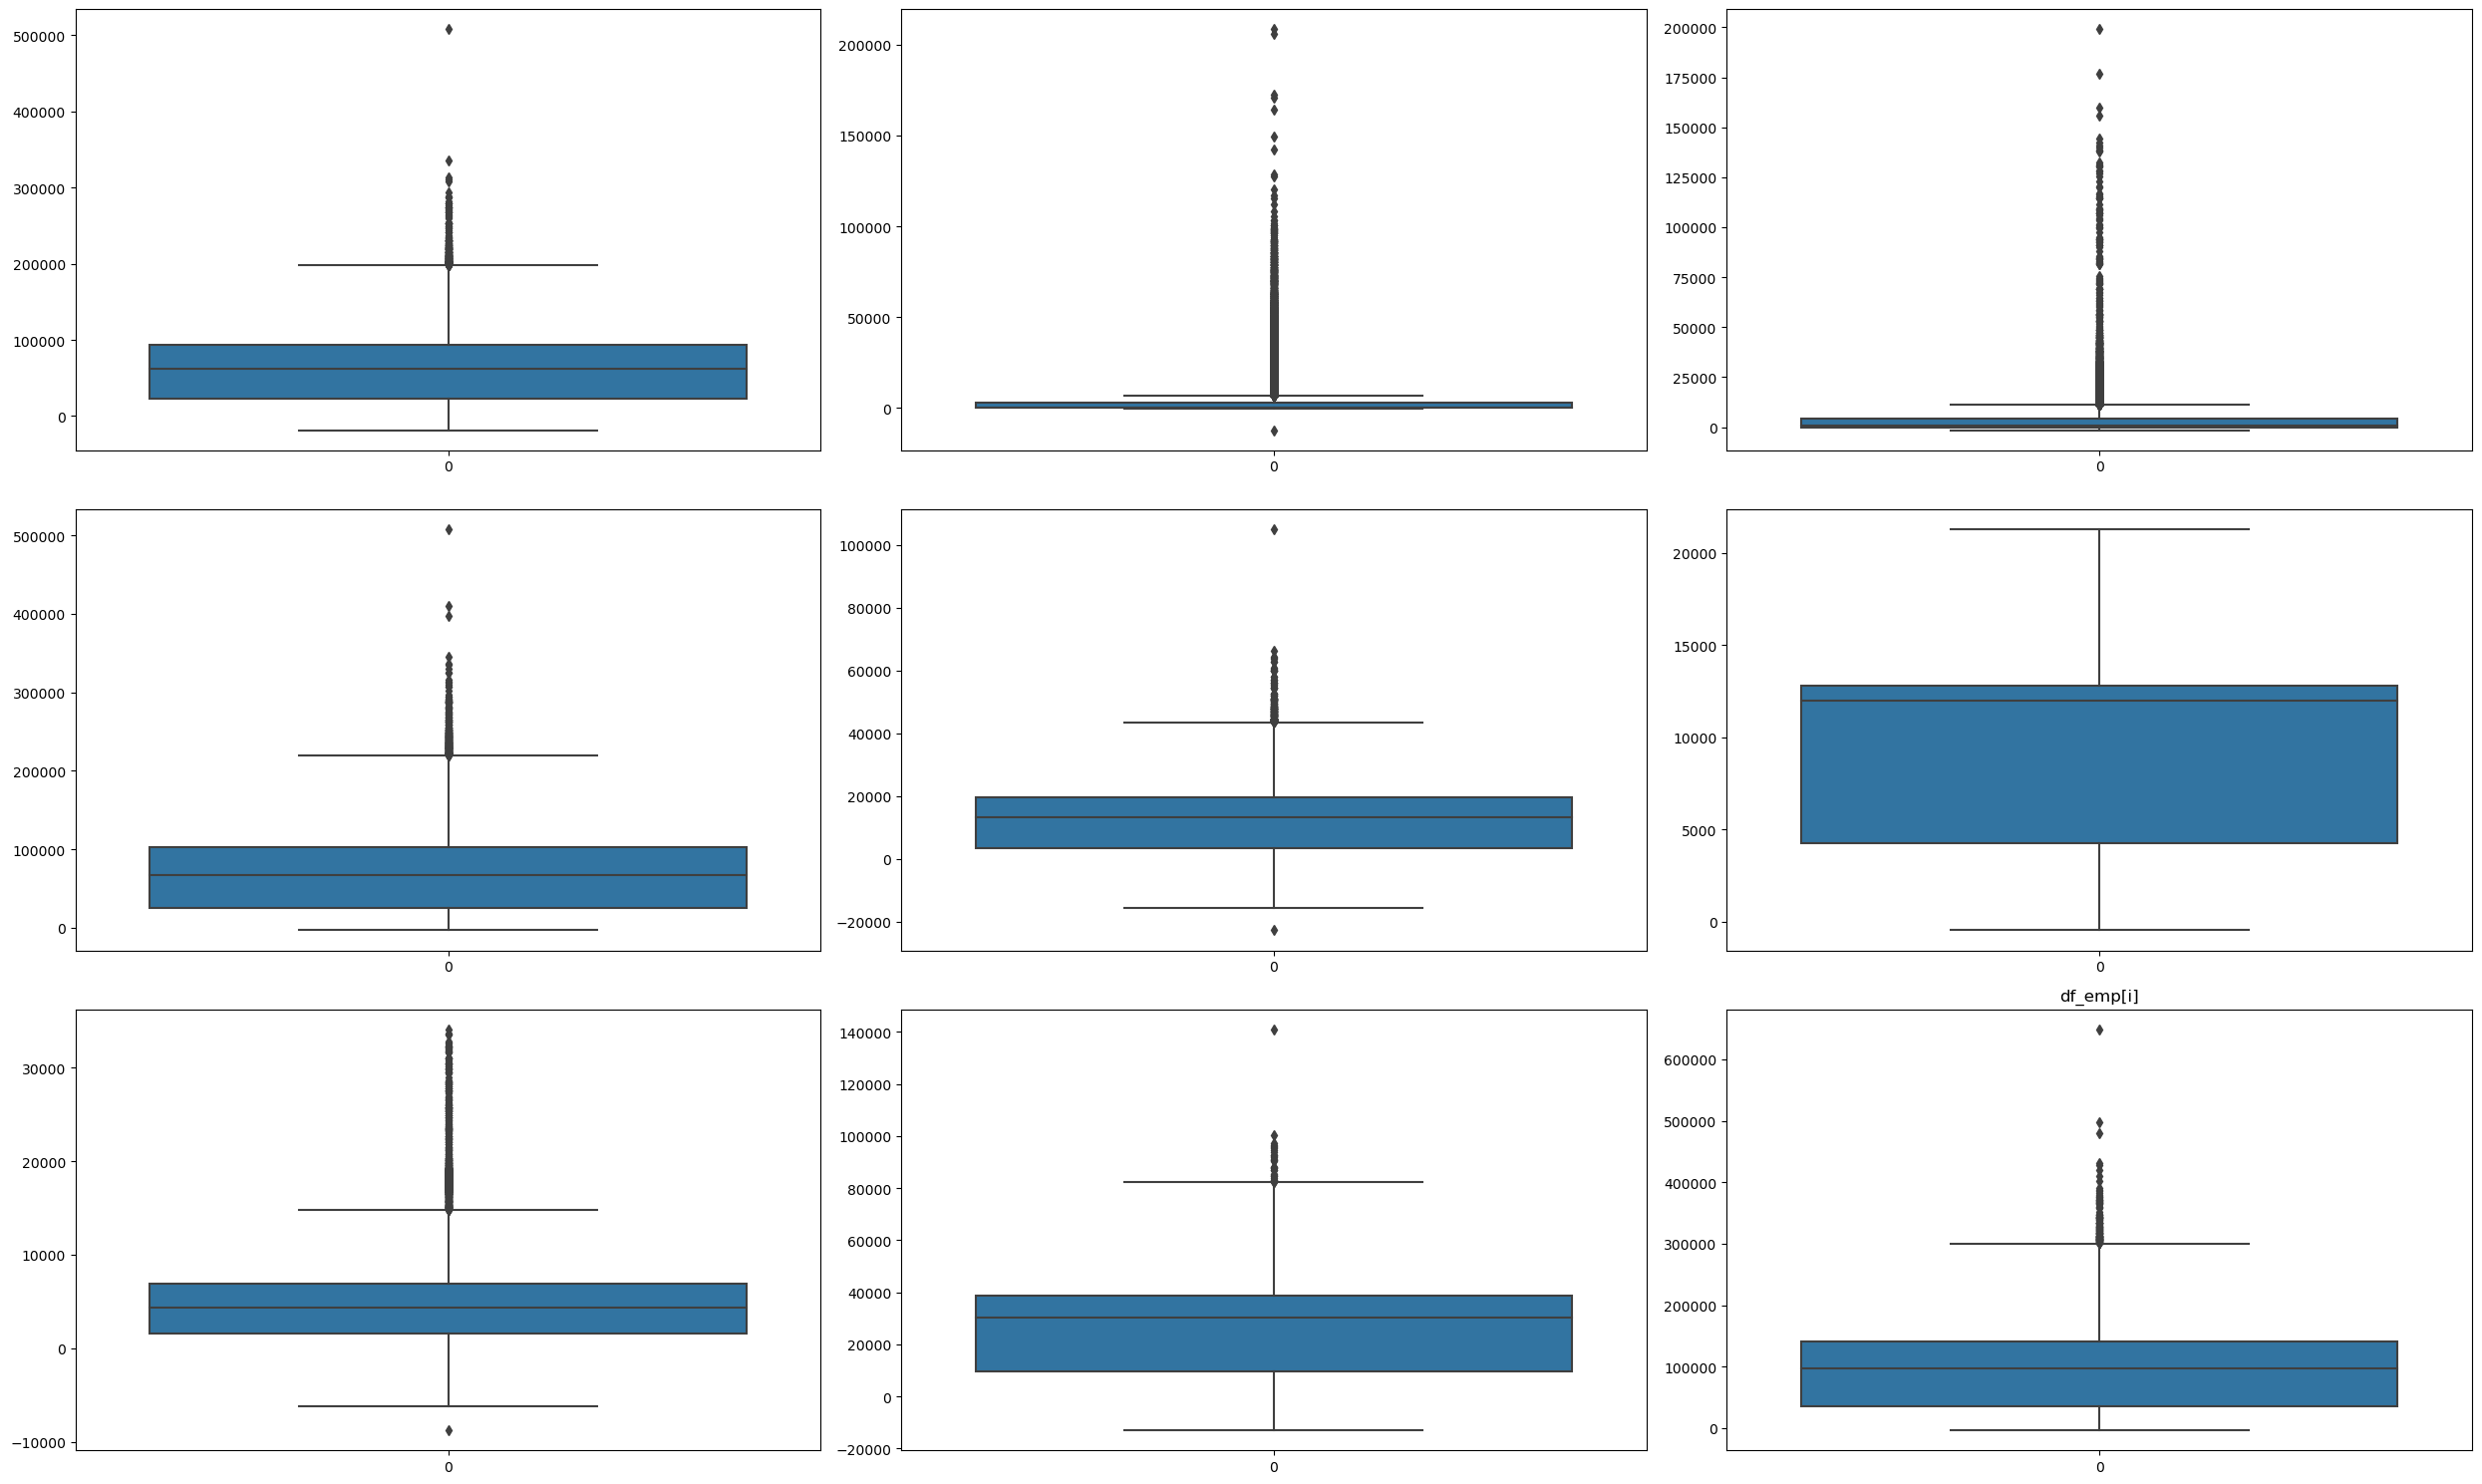

In [16]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_emp[i], ax=subplot)
    plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

Almost all the variables have outliers and they have to be treated

### Bivariate Analysis

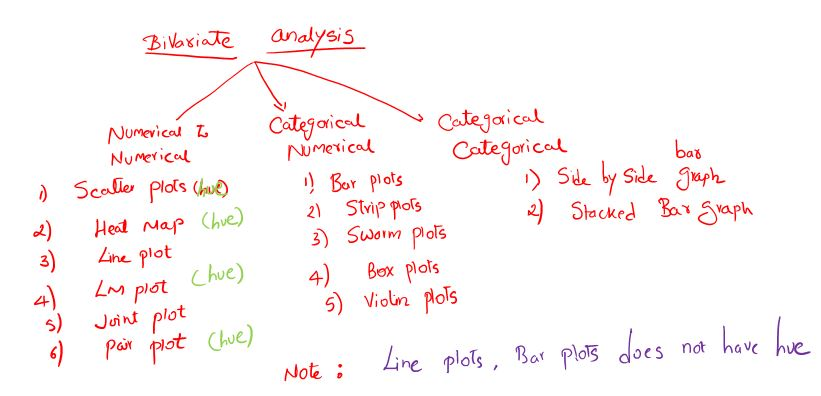

In [17]:
from IPython.display import Image
Image(filename='Bivariate.JPG',width=600,height=300)

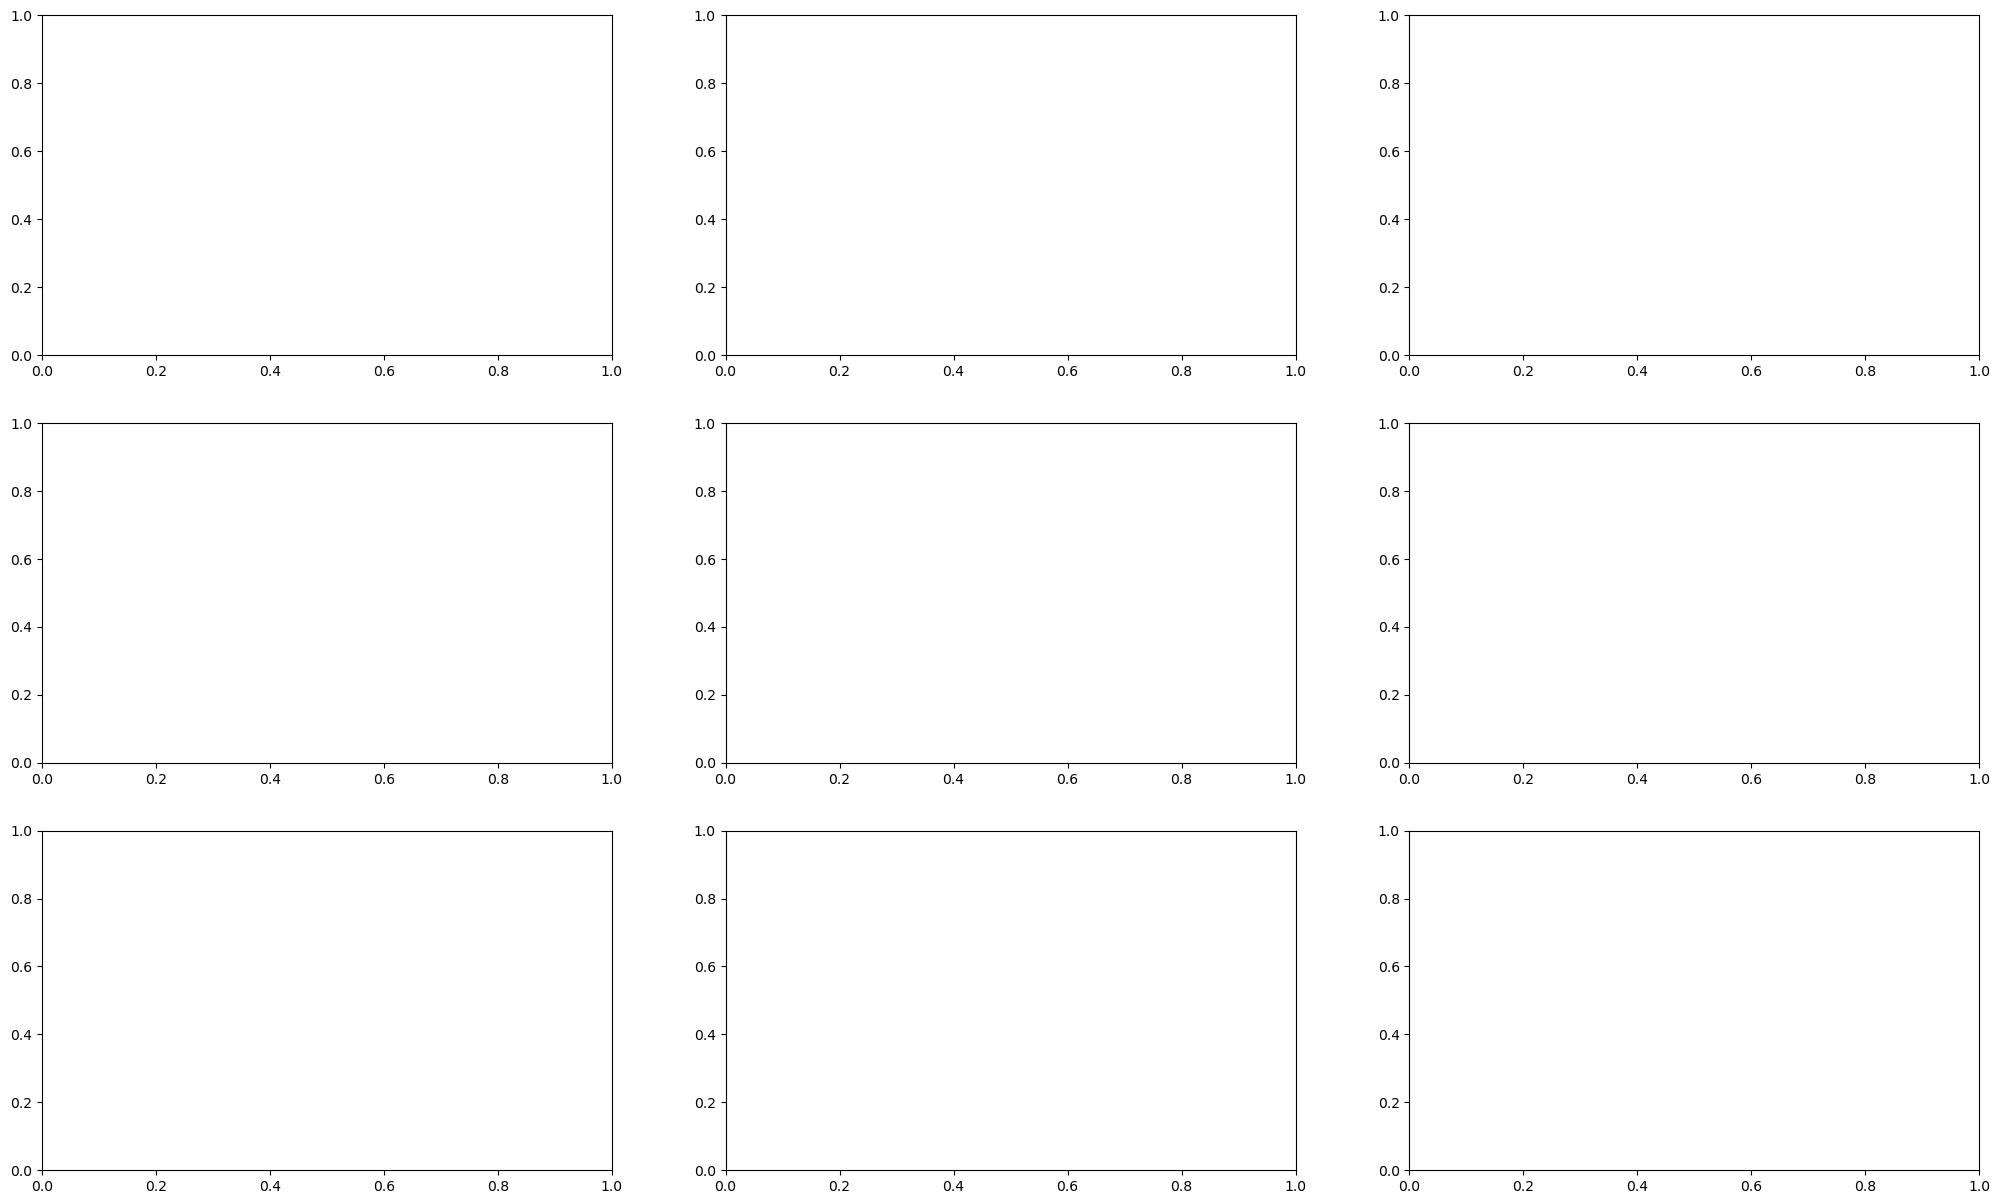

In [18]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

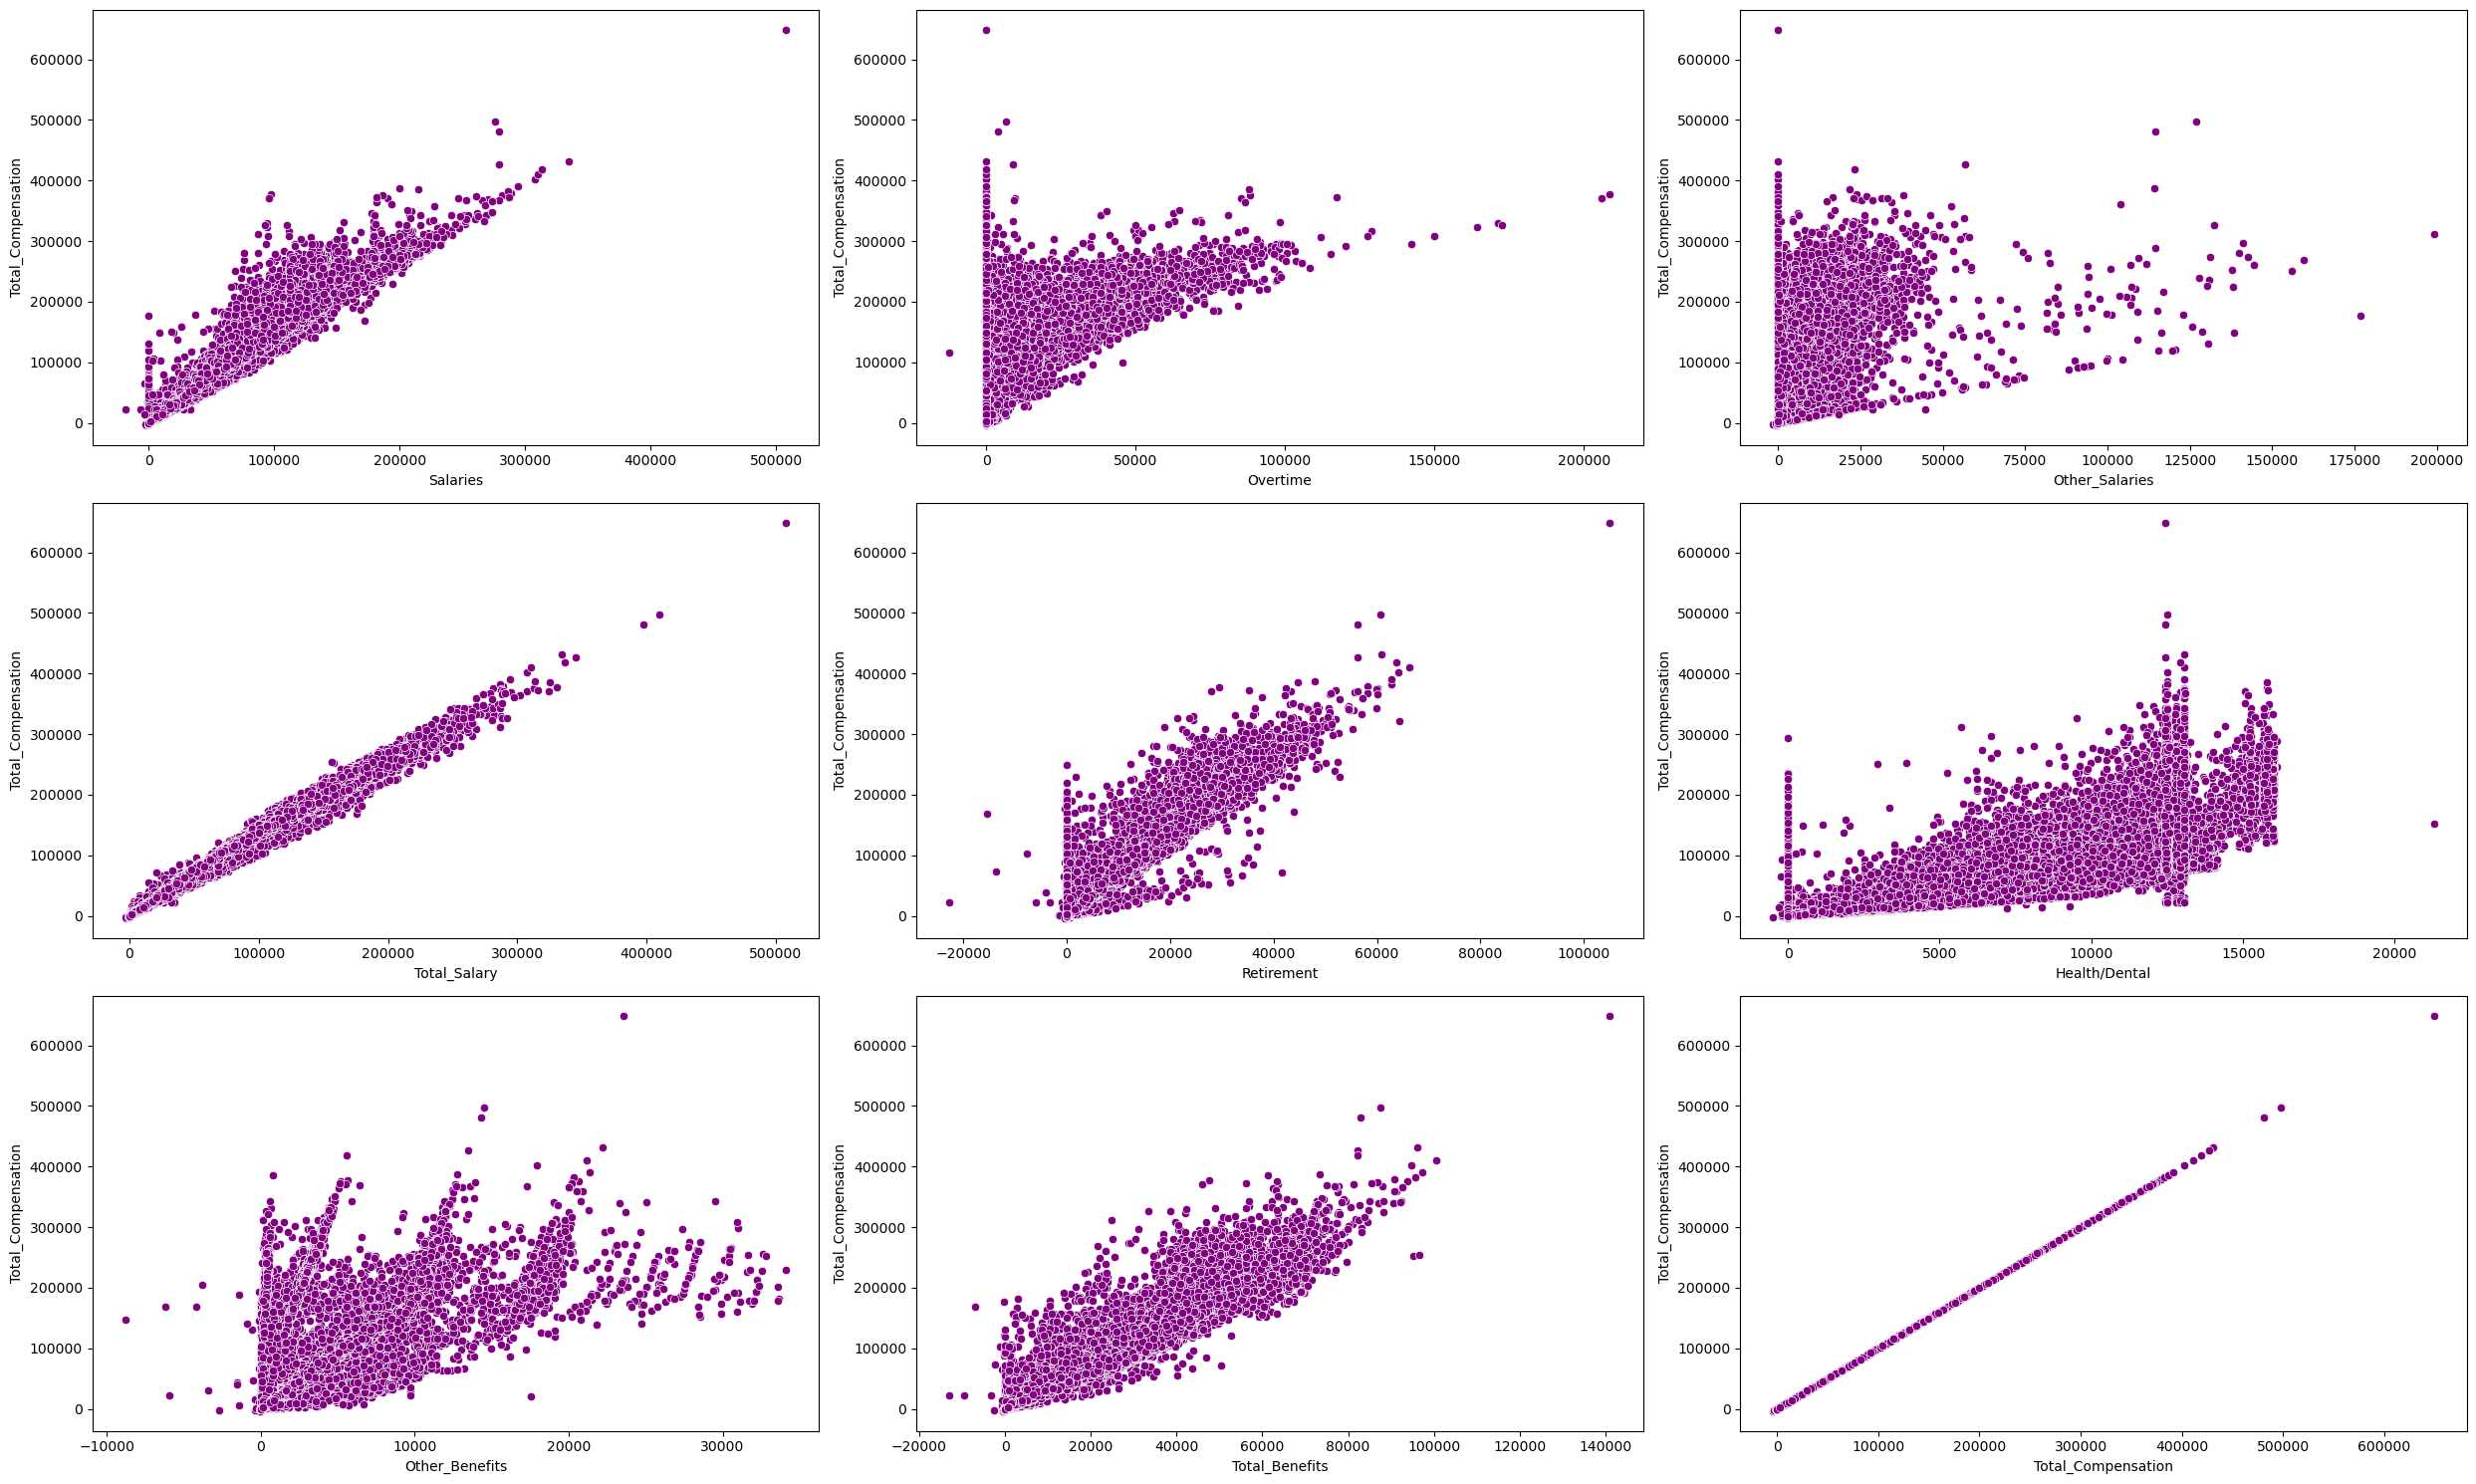

In [19]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(x=df_emp[i],y=df_emp['Total_Compensation'], ax=subplot,color='purple')
    #plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

1. All the variables are showing very high correlation with Target variable.
2. But be cautious when the correlation is very high between the variables.


**Lets check the correlation between Independent variable**

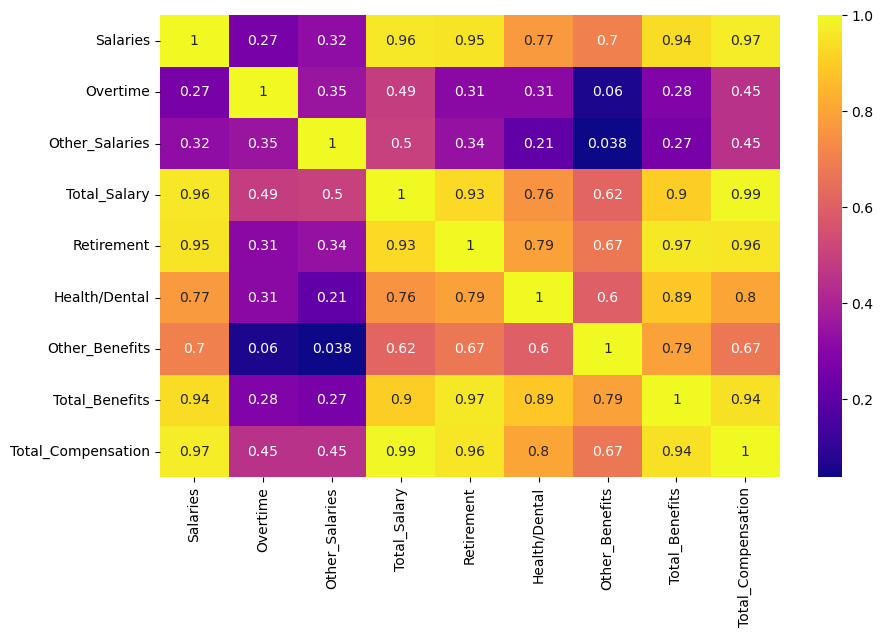

In [20]:
sns.heatmap(df_emp.corr(),annot=True,cmap="plasma")
plt.show()

1. There is a inherent problem of multicollinearity in the dataset.
2. Predictors should not be highly correlated.
3. Predictors are highly correlated with dependent variable -Total compensation.

## Outliers

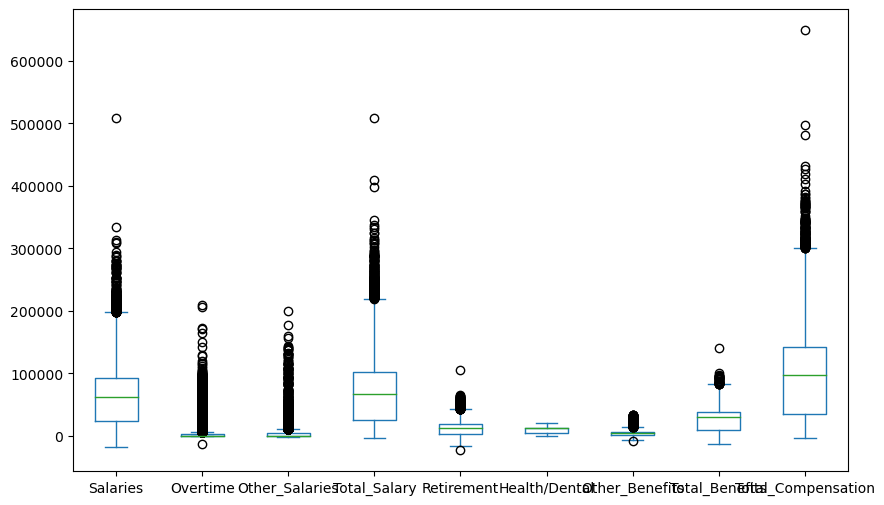

In [21]:
df_emp.plot(kind='box')
plt.show()

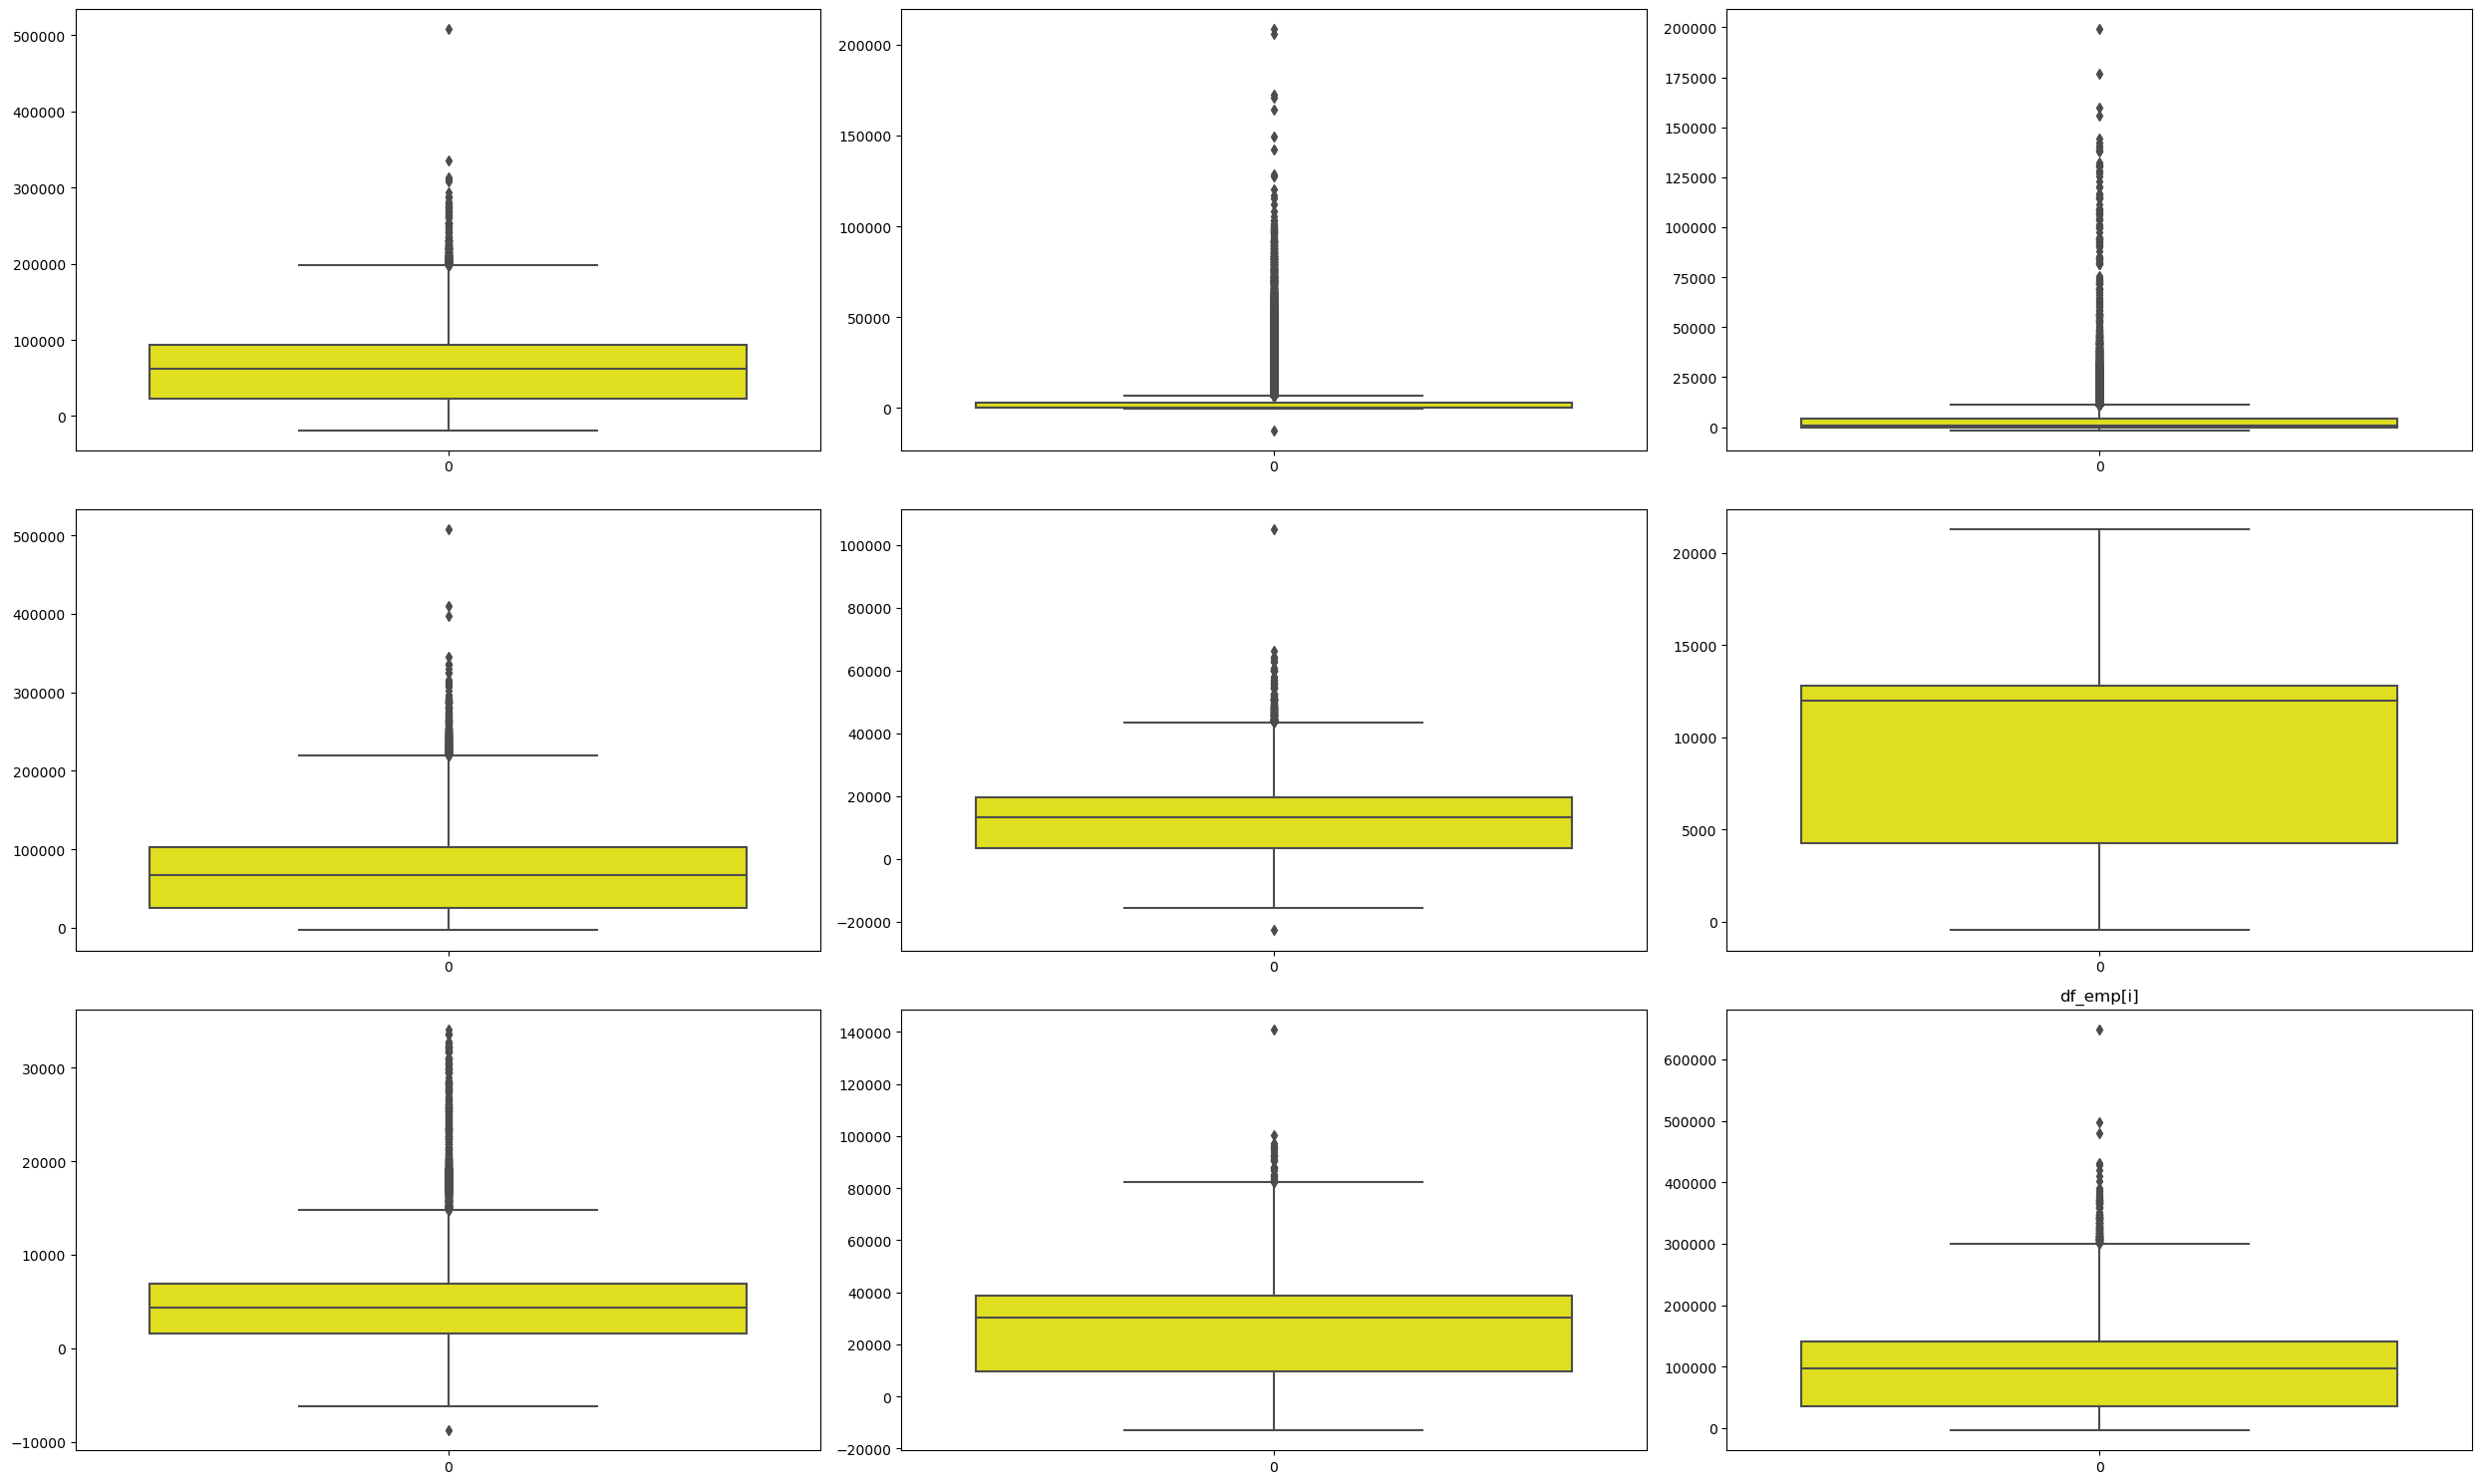

In [22]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_emp[i],ax=subplot,color='yellow')
    plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

### Missing Value

In [23]:
df_emp.isnull().sum()

Year_Type             0
Salaries              0
Overtime              0
Other_Salaries        0
Total_Salary          0
Retirement            0
Health/Dental         0
Other_Benefits        0
Total_Benefits        0
Total_Compensation    0
dtype: int64

In [24]:
# to know the percent of missing values
(df_emp.isnull().sum() /df_emp.index.size) *100

Year_Type             0.0
Salaries              0.0
Overtime              0.0
Other_Salaries        0.0
Total_Salary          0.0
Retirement            0.0
Health/Dental         0.0
Other_Benefits        0.0
Total_Benefits        0.0
Total_Compensation    0.0
dtype: float64

### Remove the outliers

1. iqr = q3-q1
2. Value > q3+1.5 * iqr
3. value < q1-1.5 * iqr

In [25]:
df_emp.shape

(50000, 10)

In [26]:
q1 =df_emp.quantile(0.25)
q3= df_emp.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

In [27]:
upper_limit

Salaries              197558.53375
Overtime                6622.20625
Other_Salaries         11192.57500
Total_Salary          219380.26625
Retirement             43612.26000
Health/Dental          25602.53500
Other_Benefits         14752.39000
Total_Benefits         82416.01500
Total_Compensation    300770.85500
dtype: float64


1. '~' returns the values that do not satisfy the given conditions
i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
2. '|' is used as 'OR' operator on multiple conditions   
3. 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)

In [28]:
df_emp[~((df_emp < (lower_limit)) | (df_emp > (upper_limit)))]

,Year_Type,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,76536.95,NaN,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
...,...,...,...,...,...,...,...,...,...,...
49995,Fiscal,100222.50,NaN,600.00,117988.63,18763.05,13068.80,9406.86,41238.71,159227.34
49996,Fiscal,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,Fiscal,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,Fiscal,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


1. Return the output row by row. Instead of Column by column.
2. Check rowwise, if the condition is met and return that data. In the second row, where the condition is met, retun the data. If the condition is not met then do not return the data.
3. any means- if the condition is met anywhere, return this data.
4. ~: Not represents returning all the values which are false.
5. ex: not(false) = True. , Not(True) = False.
6. .any(axis=1) : represents checking of the condition row wise. And whenever this condition is met, it returns the data.
7. Return the data which is the layer.  
8. if any() is not used then it will check one column with entire dataset. We need to avoid that.

In [29]:
df_emp[~((df_emp < (lower_limit)) | (df_emp > (upper_limit))).any(axis=1)]

,Year_Type,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
3,Fiscal,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
5,Calendar,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84
...,...,...,...,...,...,...,...,...,...,...
49994,Calendar,10663.05,0.00,65.93,10728.98,0.00,3152.42,879.17,4031.59,14760.57
49996,Fiscal,1787.41,0.00,0.00,1787.41,0.00,563.31,145.36,708.67,2496.08
49997,Fiscal,36552.83,0.00,0.00,36552.83,6802.48,6855.83,3071.63,16729.94,53282.77
49998,Fiscal,46995.30,0.00,10943.14,57938.44,8840.98,10624.64,4706.37,24171.99,82110.43


In [30]:
#~(df_emp > upper_limit ) | (df_emp < lower_limit).any(axis=1)
df_emp = df_emp[~((df_emp < (lower_limit)) | (df_emp > (upper_limit))).any(axis=1)]
df_emp.head()


,Year_Type,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
3,Fiscal,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62
5,Calendar,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84


In [31]:
import pandas as pd
dt = {'x1':[1,0,1,0],
      'x2':[1,0,0,0],
      'x3':[0,0,0,0]
}

df = pd.DataFrame(dt,columns=['x1','x2','x3'])
df



,x1,x2,x3
0,1,1,0
1,0,0,0
2,1,0,0
3,0,0,0


In [32]:
df.any() # this checks column wise

x1     True
x2     True
x3    False
dtype: bool

In [33]:
df.any(axis =1) # this checks row wise

0     True
1    False
2     True
3    False
dtype: bool

In [34]:
df_emp.shape

(37721, 10)

In [35]:
# def cap_outlier(val):
#     Q1, Q3 = np.quantile(val, [.25, .75])
#     IQR = Q3 - Q1
#     LL = Q1 - 1.5*IQR
#     UL = Q3 + 1.5*IQR
#     return LL, UL

In [36]:
df_emp.columns

Index(['Year_Type', 'Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary',
       'Retirement', 'Health/Dental', 'Other_Benefits', 'Total_Benefits',
       'Total_Compensation'],
      dtype='object')

In [37]:
cols

['Salaries',
 'Overtime',
 'Other_Salaries',
 'Total_Salary',
 'Retirement',
 'Health/Dental',
 'Other_Benefits',
 'Total_Benefits',
 'Total_Compensation']

In [38]:
# for i in cols:
#     LL, UL = cap_outlier(df_emp[i])
#     df_emp[i] = np.where(df_emp[i]> UL, UL, df_emp[i])
#     df_emp[i] = np.where(df_emp[i]< LL, LL, df_emp[i])

In [39]:
df_emp.shape

(37721, 10)

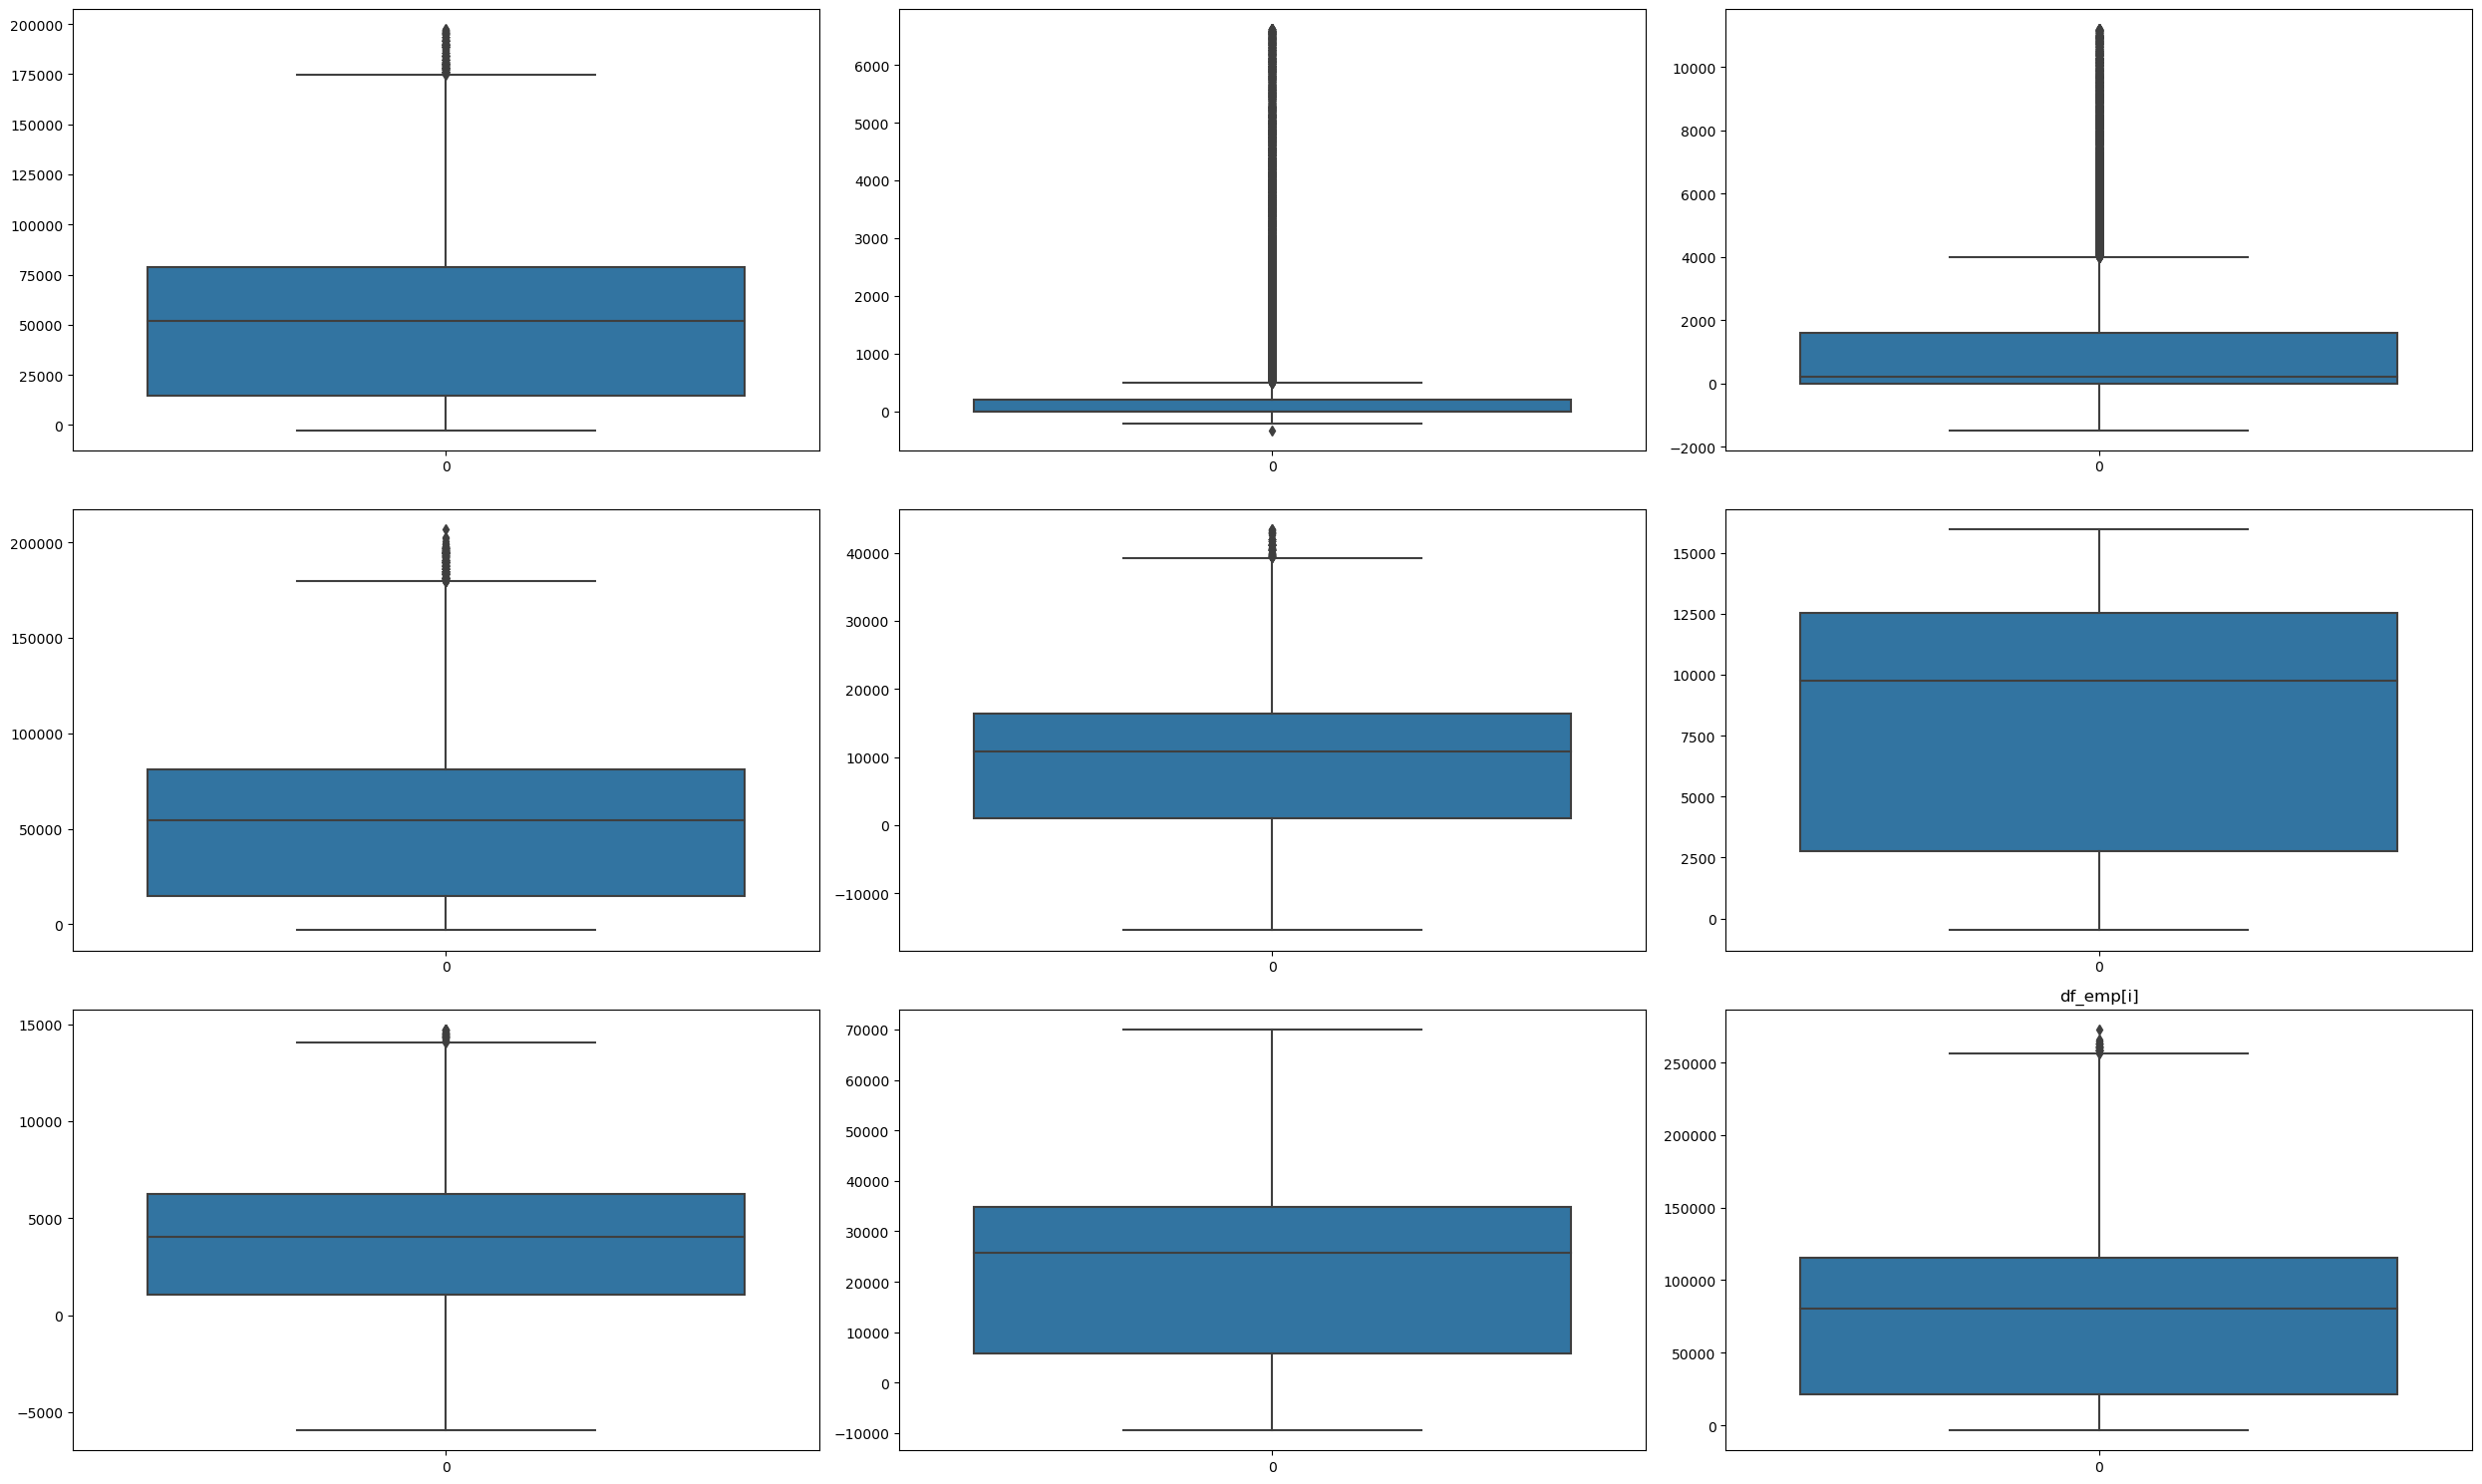

In [40]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_emp[i], ax=subplot)
    plt.title('df_emp[i]')

plt.tight_layout()
plt.show()

#### Encoding Technique

1. One Hot Encoding
2. Label Encoding
3. Target Encoding

**Target Encoding**

In [41]:
df_emp.groupby("Year_Type")['Total_Compensation'].describe()

,count,mean,std,min,25%,50%,75%,max
Year_Type,,,,,,,,
Calendar,15989.0,77171.852974,56985.227205,-2684.22,21830.6500,80886.860,115844.8100,264971.10
Fiscal,21732.0,76227.131999,56841.722237,-3518.34,20891.9875,80477.445,114683.2625,272895.06


1. **Whereever we see the Calendar, we replace by mean or median or anyother appropriate measure. Where ever we see the Fiscal, we replace with its mean or any other appropriate measure.**.
2. This is called Target Encoding
3. This is applied where you are unable to use frequency, one hot, label encoding.

**Dummy Encoding**

In [42]:
df_emp= pd.get_dummies(df_emp,drop_first=True)

In [43]:
df_emp.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_Type_Fiscal
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,1
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0
3,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1
4,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,1
5,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84,0


In [44]:
df_emp.shape

(37721, 10)

### Modelling

1. Split the Train and Test Data
2. SKLearn Linear Regression
3. Check the RMSE and R2 square value of the model
4. Improvise the model
5. Get the Statistical Summary and calculate the values that are generated.
6. Check the Assumption of the data.
7. Feature Selection.
8. Cross Validation.

In [45]:
df_emp.columns

Index(['Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement',
       'Health/Dental', 'Other_Benefits', 'Total_Benefits',
       'Total_Compensation', 'Year_Type_Fiscal'],
      dtype='object')

In [46]:
#split the data in x and y
X = df_emp.drop("Total_Compensation",axis=1)
y = df_emp['Total_Compensation']

**Ths split should always be in the sequence of xtrain, xtest, ytrain, ytest.**

In [47]:
# sklearn model
# split the data in Train and Test

from sklearn.model_selection import train_test_split
# take all the x together and then all y together.

xtrain,xtest,ytrain,ytest = train_test_split(X,y,
                                             test_size=0.30,
                                             random_state=42)

**Find the distribution of the data in xtrain and xtest as well as ytrain and ytest**

In [48]:
xtrain.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Year_Type_Fiscal
30823,78980.74,4232.85,2126.40,85339.99,15094.00,13068.80,6867.56,35030.36,1
9330,16203.23,55.76,446.76,16705.75,0.00,2705.91,1294.83,4000.74,0
36190,134005.82,0.00,0.00,134005.82,29400.78,12500.53,9895.69,51797.00,1
39239,37446.02,4171.33,1988.20,43605.55,8083.29,3514.78,740.88,12338.95,0
33618,83791.28,0.00,628.80,84420.08,15710.68,13068.80,6745.79,35525.27,1


In [49]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape) # this givee output which has only one variable-dependent variable.
print(ytest.shape) # This gives output which has only one variable-dependent variable.

(26404, 9)
(11317, 9)
(26404,)
(11317,)


1. **We will train the model on xtrain and ytrain and then predict the model on xtest**
2. **Compare the model performance using ytest**

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

**Overfitting and Underfitting**


1. If the training error =0 (close to 0) and test error is higher then it is case of overfitting.
2. If the training error and testing error has large difference then it is case of overfitting. This is when machine learns very well on training data but it is not able to generalise on unseen test set.
3. If the trainning error =0 or very close to 0 then it is overfitted.
4. If the train error and test error are high then this is case of underfitting.
5. In underfitting conditions, machine does not learn well on training data as well as does not perform well on test data.
6. Overfitting conditions are High variance and underfitting conditions are high bias condition.


**Lets create Machine Instance**

In [51]:
lr=LinearRegression()

# build the model and find the r2score with RMSE

model_emp = lr.fit(xtrain,ytrain)

pred_train = model_emp.predict(xtrain)  # the machine gets trained on train data and then predict on training data
pred_test = model_emp.predict(xtest)    # the machine gets trained on train data and then predict on testing data


# pred_train = lr.fit(xtrain,ytrain).predict(xtrain)

# pred_test=lr.fit(xtrain,ytrain).predict(xtest)


In [52]:
# r2_score (actual,predicted)

r2_train = r2_score(ytrain,pred_train)
r2_test =  r2_score(ytest ,pred_test)

print("R2 Train: ", r2_train)
print("R2 Test:  ", r2_test)

R2 Train:  1.0
R2 Test:   1.0


**This is the case of overfit model.**

**Lets check the error - Y-Yhat**

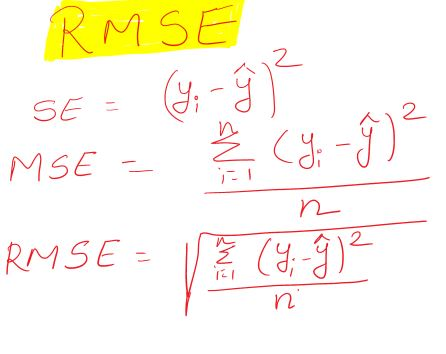

In [53]:
Image(filename='RMSE.JPG',width=400,height=300)

**Mean Square Error and RMSE**

In [54]:
# Mean Squared Error
print("MSE Train :", mean_squared_error(ytrain,pred_train))
print("MSE Test  :", mean_squared_error(ytest,pred_test))


print("RMSE Train :", np.sqrt(mean_squared_error(ytrain,
                                                 pred_train)))

print("RMSE Test  :", np.sqrt(mean_squared_error(ytest,
                                                 pred_test)))



MSE Train : 4.093299168650598e-20
MSE Test  : 4.1130138233384034e-20
RMSE Train : 2.0231903441472326e-10
RMSE Test  : 2.0280566617672209e-10


1. The R2 value is 1 and the RMSE is close to 0. This indicates that the model is overfitted model.
2. This gets replicated in Test where the error is close to 0 as well as R2 value is close to 1.

### Assumptions of Linear Regression Model

1. Linearity.
2. Normality.
3. Multicollinearity.
4. Hetroscedasticity.
5. Autocorrelation of errors.

	1. Normality Test for residuals - JARQUE BERA TEST
	2. Auto correlation Test for residuals : Durbin Watson Test. Range is from 0 to 4. Tolerance range is from 1.5 to 2.5
	3. X and Y should be linearly related with eachother.  -RAINBOW TEST
	4. Multicollinearity: Variables should be independent of each other- There should not be highly correlated.- Test : Correlation , Condition No:
	5. Heteroscedasticity : The data has unequal variance. Residuals should have unequal variance. 	statistical test : Breusch Pagan Test **bold text**

**All the Assumptions have to be Met. If they fail then the model cannot be deployed**

1. Can you check assumptions using SKlearn way-model ?
2. We require statistical models for checking the above assumptions.

1. When we work with statsmodel.formula.api , we write y is function of x. However when the number of predictors increase, it becomes too difficult.
2. Statsmodel.api gives the flexibility just by mentioning xtrain, ytrain.
3. However, in statsmodel.api does not have constant or intercept. We need to manually append a constant. This is not the case with statsmodel.formula.api

In [55]:
# Linearity Assumption

# H0: Data has Linear Relationship with the Target Variable.
# Ha: Data has non Linear releationship with target variable.

import statsmodels.api as sma
# it does not take intercept. We need to give add the intercept.
# add constant to the data

1. statsmodels.api does not calculate the intercept on its own. Here we use OLS (All capital )
2. Statsmodels.formula.api calculates the intercept on it own. Here it is ols(All small leters)
3. Add constant while working with sma. The moment it sees the constant, it will calculate the intercept.

In [56]:
sma.add_constant(xtrain)
# this constant will tell to calculate the intercept. This is temperarory. It has no impact on the model.

,const,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Year_Type_Fiscal
30823,1.0,78980.74,4232.85,2126.40,85339.99,15094.00,13068.80,6867.56,35030.36,1
9330,1.0,16203.23,55.76,446.76,16705.75,0.00,2705.91,1294.83,4000.74,0
36190,1.0,134005.82,0.00,0.00,134005.82,29400.78,12500.53,9895.69,51797.00,1
39239,1.0,37446.02,4171.33,1988.20,43605.55,8083.29,3514.78,740.88,12338.95,0
33618,1.0,83791.28,0.00,628.80,84420.08,15710.68,13068.80,6745.79,35525.27,1
...,...,...,...,...,...,...,...,...,...,...
22421,1.0,5688.48,0.00,10.53,5699.01,0.00,3050.32,441.23,3491.55,1
8344,1.0,101835.02,0.00,9038.07,110873.09,21290.50,11181.43,778.69,33250.62,0
15037,1.0,11693.06,0.00,0.00,11693.06,2129.29,2825.01,975.27,5929.57,1
1151,1.0,47333.30,2507.07,1910.20,51750.57,11337.29,12419.01,4058.27,27814.57,0


In [57]:
# we require the constant only in xtrain,xtest.....nothing in y. Do not add constant in y.
t_train = sma.add_constant(xtrain)   #has_constant='add'
t_test  = sma.add_constant(xtest)

In [58]:
t_train.shape

(26404, 10)

In [59]:
t_train.describe().T

,count,mean,std,min,25%,50%,75%,max
const,26404.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.00
Salaries,26404.0,52305.154599,40589.005782,-960.30,14383.9200,51800.850,78522.0225,197531.00
Overtime,26404.0,576.749333,1343.265170,-327.22,0.0000,0.000,205.6350,6621.48
Other_Salaries,26404.0,1393.914389,2381.342313,-618.13,0.0000,200.000,1578.2900,11192.43
Total_Salary,26404.0,54275.818321,41537.036487,-960.30,15065.5025,54475.330,80631.9625,202471.48
Retirement,26404.0,10344.270639,8782.566546,-15448.48,1074.6025,10819.450,16337.3025,43349.59
Health/Dental,26404.0,7912.548487,4996.364989,-193.95,2784.6275,9687.840,12512.5500,15816.57
Other_Benefits,26404.0,4047.774783,3101.662072,-4193.63,1078.6225,4011.515,6244.6025,14739.37
Total_Benefits,26404.0,22304.593910,15908.966895,-6877.25,5787.1800,25729.400,34745.7825,67152.48
Year_Type_Fiscal,26404.0,0.575784,0.494233,0.00,0.0000,1.000,1.0000,1.00


In [60]:
#sma.OLS(y,x) only on training data
model = sma.OLS(ytrain,t_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.309e+31
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:37:22   Log-Likelihood:             5.2637e+05
No. Observations:               26404   AIC:                        -1.053e+06
Df Residuals:                   26396   BIC:                        -1.053e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.157e-10   7.41e-12    -15.610      0.000    -1.3e-10   -1.01e-10
Salaries             0.2500   6.96e-16   3.59e+14      0.000       0.250       0.250
Overtime             0.2500    2.1e-15   1.19e+14      0.000       0.250       0.250
Other_Salaries       0.2500   1.45e-15   1.72e+14      0.000       0.250       0.250
Total_Salary         0.7500   6.81e-16    1.1e+15      0.000       0.750       0.750
Retirement           0.2500   1.21e-15   2.06e+14      0.000       0.250       0.250
Health/Dental        0.2500   1.24e-15   2.01e+14      0.000       0.250       0.250
Other_Benefits       0.2500   1.81e-15   1.38e+14      0.000       0.250       0.250
Total_Benefits       0.7500   6.21e-16   1.21e+15      0.000       0.750       0.750
Year_Type_Fiscal -2.201e-11   6.64e-12     -3.316      0.001    -3.5e-11      -9e-12
==============================================================================
Omnibus:                     1477.901   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1741.647
Skew:                           0.629   Prob(JB):                         0.00
Kurtosis:                       2.971   Cond. No.                     1.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

1. All the features are important.
2. Rsquare and Adj R2 sqaure is 1. Which says the model is overfit condition.
3. F Statistics is telling that the model is significant.
4. The standard error for each and every variable is close to 0. Which means the predictions are very close to the actuals. If r2 =1 then the error will be very very low. There is no deviation between actual and predicted then RMSE will also be close to 0.
5. The model has perfectly trained on trained data.
6. There is a relation between t and standard error. t statistics is very large as standard error is very low.
7. Is there a relation between t and standard error ?
7. t statistics = coeff / Standard Error.
8. If t statistics is very large then p value is going to be very small.
9. Standard Error is almost zero. So t statistics is coeff / SE which happens to be very large. p value is dependent upon t Statistics.
10. When t statistics is very large then p value is very small. When t statistics is very small then p value is very large.
11. Standard Error is very low that it is giving a falsified effect that the variables are significant.
11. p value is the probability of null hypothesis being true. So when p value is low, then Null will go.
12. So when literally there is no error in that case t statistics inflates which makes the p value low.
13. Statistics tells that each and every variable is significant. Which is actually falsified.
14. The model is a perfect model with rsquare =1 and adj r2 = 1.
15. When the error is zero, Standard Error will be Zero. When SE is ZERO , the RMSE will be ZERO.
16. When the error =0 it means the model is predicting each and every variable right.
16. Test Statistics is the derived variable of coefficient and Standard Error.
17. The confidence Interval Range is calculated field. So it will calculate the range. But the range can not be relied upon. The confidence is not telling anything.
18. Why is that we see RMSE =0 because the predictors are highly correlated then this kinds of patterns will be replicated.

1. Algorithm has given equal weightage for most of the variables. This is practically not possible.
2. The constant is 0. which means the line is passing through the (0,0)
3. Generally in a model when the weightage is equal, there is presence of multicollinearity.
4. Ideally each feature should have a different coefficient value.
5. Confidence is build around the same numbers- SE and coefficents.

**Confidence Interval**

1. Confidence Interval cannot be relied upon. When the error is 0 then there is no range at all.
2. There is nothing like 100% accurate.

1. Durbin Watson :
  If the value is between 1.5 to 2.5 - there is no auto correlation between the errors.
Below 1.5 and above 2.5 is high correlation. Looing at the values there seems to be high correlation

Durbin Watson Test

	1. Durbin Watson test value is not a good value. These are the red flag for Auto correlation. This model cannot be applied.

	2. JB Test : The null hypothesis is rejected. Data is not Normal.
		a. H0: The data is normal.  Ha : Data is not normal

	3. The condition number tells Multicollinearity in the data. If it is greater than 1000 then it is highly colinear.

	4. Here the value is greater than lakhs which tells that the data is highly colinear and leads to multicollinearity.

	5. In summary
		a. Data is not normal
		b. Presence of Auto correlation.
		c. R2 =1
		d. Rmse is close to zero
		e. SE is close to Zero.
		f. All the variables have same weights
    g. Condition No is greater than 10 which indicates high Multicollinearity.

**Condition Number**

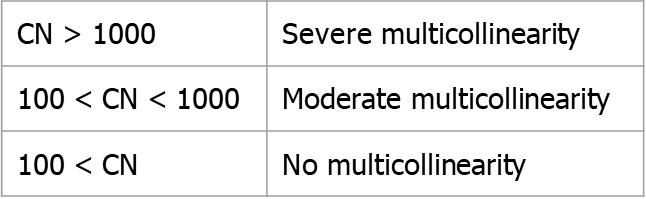

### Assumption of Linear Regression

1. Linearity - Rainbow Test.
2. Normality - Jarque Bera Test, Residual Plot, Probplot
3. Multicollinearity
4. Heteroscedasticity
5. Autocorrelation of Errors

### Test of Linearity - Rainbow Test


H0: Data has Linear relationship with the Target.

Ha: Data has no linear relationship with the Target.

Any test statics gives 2 output - test statistics and p value.

If p value is very low then test statistics value is very high.

In [61]:
sma.stats.linear_rainbow(model)

(12.390894121535583, 0.0)

**Since the p value is less than 0.05. We reject the null hypothesis. Data is non linear.**

### Test of Normality - Jarque Bera Test

H0: Data/Residual are Normally distributed.

Ha: Data/Residuals are not Normally distributed.

In [62]:
# residual is error = Yi -Yhat
stats.jarque_bera(model.resid)

SignificanceResult(statistic=1741.6467483546646, pvalue=0.0)

**JB Test is based on Kurtosis and skewness**

**Shapito Test**

In [63]:
# shapiro test for Normality
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9426624774932861, pvalue=0.0)

**QQ Plots**

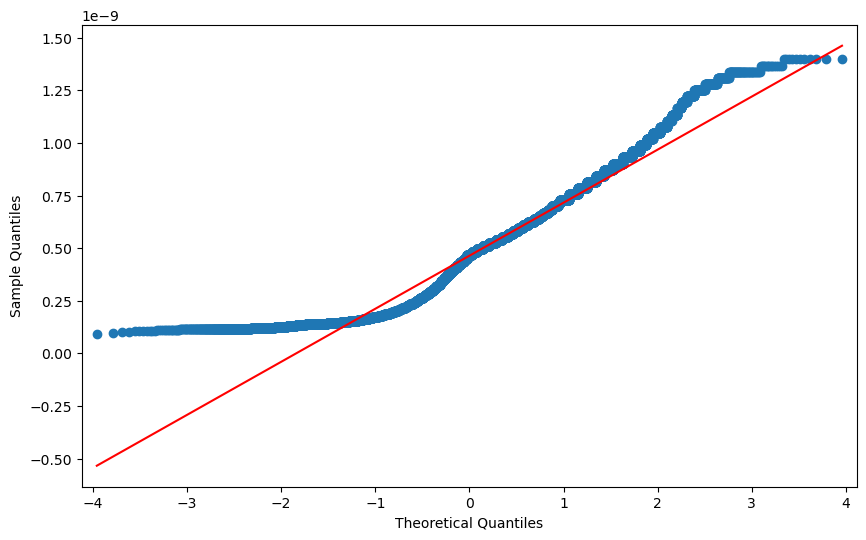

In [64]:
sma.qqplot(model.resid,line='r');

### Test of Multicollinearity -


1. Multicollinearity refers to the predictor variables being highly correlated among the themselves.
2. Most of the time, all the highly correlated predictors will have more or less the same impact on the model.
3. Since they have more or less the same impact, it may not be right to keep all the variables to predict the target.
4. If there are 2 or more predictors having multicollinearity, then one of the variables can be  dropped.

**How to check the Multicollinearity **

1. Correlation -Using Heatmap
2. Condition No:

      If the CN > 1000 - presence of HIGH MULTICOLLINEARITY.

      If CN is between 100 - 1000, then there is Moderate Multicollinearity

      If CN < 100, then Low collinearity

3. Conditon No tells the presence of Multicollinearity but does not tell about the columns which have Multicollinear


Working of VIF
------------------------
	1. It never includes your target. Because, we want all the predictors to have good relationship with the target. We are only referring to X and not Y.
	2. Each variable will be considered as Target with the rest of the predictors as independent variables.
	3. This keeps happening till all the features are exhausted.
	4. R2 is calculated for each of the variable. This R2 is not of the Model.
	5. Value is replaced in VIF formula and calculated.
	6. VIF is calculated in the form of the table.
	7. VIF > 10 is considered to be highly correlated. Between 5-10-Moderate muticollinearity. Between 1-5 hardly collinear.
	8. Consider only the training data- xtrain and not target -y.

Difference Between Condition No: and VIF
-----------------------------------------------------------
	1. VIF tells which features are highly correlated vs the rest.  Condition No: Will tell about the whole model. VIF will tell about each and every column.
	2. VIF tells about each and every feature.  VIF = 1/1-R2

# Variation Inflation Factor

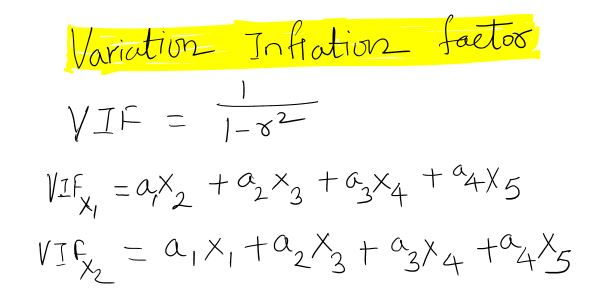

In [65]:
Image(filename='VIF.JPG',width=400,height=300)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# This is work in the form of a loop

In [67]:
xtrain.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Year_Type_Fiscal
30823,78980.74,4232.85,2126.40,85339.99,15094.00,13068.80,6867.56,35030.36,1
9330,16203.23,55.76,446.76,16705.75,0.00,2705.91,1294.83,4000.74,0
36190,134005.82,0.00,0.00,134005.82,29400.78,12500.53,9895.69,51797.00,1
39239,37446.02,4171.33,1988.20,43605.55,8083.29,3514.78,740.88,12338.95,0
33618,83791.28,0.00,628.80,84420.08,15710.68,13068.80,6745.79,35525.27,1


In [68]:
for i in range(xtrain.shape[1]): # 1 is for columns
  print(i)

0
1
2
3
4
5
6
7
8


In [69]:
variance_inflation_factor(xtrain.values,i)

1.756089485551688

In [70]:
# Lets create a list of VIF

vif_list=[]
for i in range(xtrain.shape[1]):
  vif_list.append(variance_inflation_factor(xtrain.values,i)) # this creates VIF and now lets puts the output into a Dataframe

pd.DataFrame({'Features':xtrain.columns,"VIF":vif_list}).sort_values(by="VIF",
                                                                      ascending=False)

,Features,VIF
0,Salaries,inf
1,Overtime,inf
2,Other_Salaries,inf
3,Total_Salary,inf
4,Retirement,inf
5,Health/Dental,inf
6,Other_Benefits,inf
7,Total_Benefits,inf
8,Year_Type_Fiscal,1.756089


**Highly Collinear. High presence of Multicollinearity. All variables are highly collinear**

**The Model assumptions are not being met. Hence, from statistical point of view, we will not go ahead with the model**

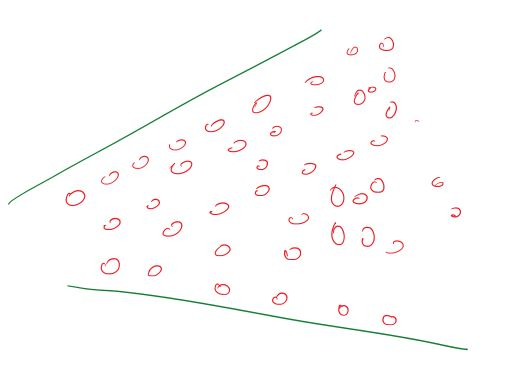

In [71]:
Image(filename='Heteroscedasticity.JPG',width=400,height=300)

### Heteroscedasticity

1. The scatter plot between the residual and the fitted (predicted) model.
2. Presence or absence of Heteroscedasticity is checked in this plot.
3. There should not be any pattern. Or to say, it should be random.


1. It is funnel shape. It means that variance that you see is not the same at each point.
2. It is unequal variance. It can be increasing or decreasing variance. Such pattern are called as unequal variance.
3. If the data is not heteroscedasticity then it exhibits homoscedasticity.
4. Why does this happen ? Look at the Age and Income. As the Age increases, the experience increases, and the salary increases. Nothing wrong about it.
5. It starts creating a Funnel Structure here.  Moment you see a funnel structure, you can anticipate which model cannot work.
6. Linear regression will not work for the data which shows funnel structure or exhibiting Heteroscedasticity.
7. Heteroscedasticity is the case of unequal variance.
8. We need to have consistent variance.
9. It also significance of outliers in the data .As we have outliers, the variance of the data keeps changing.
  

**Heteroscedasticity Test**

If a plot is created between fitted values and residuals, it will gives us the presence of Hetroscedasticity or not.

It is a plot between fitted value and model residuals.

**BreuschPagan Test**

H0: There is equal variance present in the data

Ha: There is unequal variance in the data.

In [72]:
import statsmodels.stats.api as ssa

#model.exog: It represents all the data points or input variables.
#exog : Independent Variables.
#endog : Dependent Variables.
# This is compared between residuals vs actual values.
ssa.het_breuschpagan(model.resid,model.model.exog)

(25366.051394948165, 0.0, 92154.61692724645, 0.0)

1. BreushPagan Test Statistics and p value 24418.06, 0.0
2. Fstatistics and p value 46364.52, 0.0
3. The first 2 values are BreushPagan Test statistics and p value.
4. The second set of values are FStatistics and p value.
5. There are 2  values coming out here because of the input. One is the Test that we are conducting and other is the Fstatistics of the Input data.

**P value < 0 . Which means the data is Heteroscedastic**

In [73]:
import statsmodels.stats as sa
sa.diagnostic



<module 'statsmodels.stats.diagnostic' from 'C:\\ProgramData\\anaconda3\\lib\\site-packages\\statsmodels\\stats\\diagnostic.py'>

**Durbin Watson**

In [74]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

0.4749287388896089

1. Durbin Watson should be between 1.5 to 2.5.
2. There is presence of Auto correlation of errors.

**All the assumptions are not met.**